<a href="https://colab.research.google.com/github/HaikalFrds/Project-3-SynergyTeam-House-Pricing-Prediction/blob/main/Project_3_SynergyTeam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="text-align: center; max-width: 700px; margin: auto; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;">

# <b><span style='color:#E1B12D'>FlipWise: Property Identification System for Flip Opportunities</span></b>  
## Project 3 — Synergy Team  
### House Pricing Prediction — Real Estate Industry

---

<span style="color:#27AE60; font-size: 1.2em;"><b>Data Task</b></span>  
Haikal Firdaus  
Adhi Kurniawan  
  
<br>

<span style="color:#2980B9; font-size: 1.2em;"><b>Modeling Task</b></span>  
I Putu Ferry Wistika  
Lukas Yuliyanto Gunawan  
Muhammad Egalingga Zainuri

</div>


Industri real estate di Indonesia berkembang pesat, namun para investor masih menghadapi tantangan dalam mengidentifikasi properti dengan potensi peningkatan nilai yang optimal. Meskipun data pasar tersedia, pendekatan tradisional dalam valuasi sering kali tidak cukup efisien untuk mengungkap peluang investasi terbaik.

Perusahaan menyadari bahwa pendekatan tradisional dalam valuasi properti tidaklah cukup efisien. Para investor kesulitan memastikan properti mana yang benar-benar memiliki spesifikasi dengan potensi peningkatan nilai optimal.

Kami memutuskan mengadopsi solusi berbasis machine learning. Dengan menganalisis data historis properti, karakteristik fisik, dan faktor lokasi, kami yakin dapat mengembangkan model untuk memprediksi harga properti dan mengidentifikasi peluang flip terbaik.

Objective: Meningkatkan efisiensi investasi properti dengan memprediksi potensi peningkatan nilai rumah menggunakan model machine learning.




# <span style="font-size:1.6em; color:#E1B12D;"><b>Data Extraction</b></span>

The dataset used in this project is the **Ames Housing Dataset**, which contains detailed information on home sales in **Ames, Iowa** from 2006 to 2010. This dataset includes:

- 🗂️ `train.csv` — training data that includes property information **along with sale prices**  

---

The dataset provides a wide range of features describing various aspects of residential properties:

- 🏠 **Physical characteristics** — size, number of rooms, construction quality, etc.  
- 📍 **Location-related features** — neighborhood, zoning, etc.  
- 🛠️ **Additional details** — garage, basement, exterior features, etc.  
- 📆 **Sales information** — year sold, sale condition, and more


In [ ]:
descriptive_names = {
        'OverallQual': 'Kualitas Material dan Finishing Rumah',
        'OverallCond': 'Kondisi Umum Rumah',
        'GrLivArea': 'Luas Area Tinggal di Atas Tanah (sq.ft)',
        'TotalBsmtSF': 'Total Luas Basement (sq.ft)',
        'GarageArea': 'Luas Garasi (sq.ft)',
        'YearBuilt': 'Tahun Pembangunan Rumah',
        'YearRemodAdd': 'Tahun Renovasi Terakhir',
        'SalePrice': 'Harga Jual (USD)',
        '1stFlrSF': 'Luas Lantai 1 (sq.ft)',
        '2ndFlrSF': 'Luas Lantai 2 (sq.ft)',
        'LotArea': 'Luas Lahan (sq.ft)',
        'BedroomAbvGr': 'Jumlah Kamar Tidur di Atas Tanah',
        'KitchenAbvGr': 'Jumlah Dapur di Atas Tanah',
        'TotRmsAbvGrd': 'Total Ruangan di Atas Tanah',
        'Fireplaces': 'Jumlah Perapian',
        'GarageCars': 'Kapasitas Garasi (Mobil)',
        'FullBath': 'Jumlah Kamar Mandi Lengkap',
        'HalfBath': 'Jumlah Kamar Mandi Setengah',
        'MoSold': 'Bulan Terjual',
        'YrSold': 'Tahun Terjual',
        'MasVnrArea': 'Luas Veneer Batu (sq.ft)',
        'LotFrontage': 'Lebar Lahan ke Jalan (ft)',
    }

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Import library**

In [ ]:
# Data Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Statistics
from scipy import stats
import scipy.stats as stats

# Preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler
from sklearn.decomposition import PCA

# Feature Selection
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from xgboost import XGBRFRegressor

# Evaluation Metrics
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict

# Warnings and Display Settings
import warnings
warnings.filterwarnings('ignore')

# Pandas display setting
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Plotting styles
sns.set(style="whitegrid")
plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = (12, 8)

## **Ekstraksi Data**

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/Project/house_price_prediction/train.csv')

In [ ]:
print("Dataset Training:")
print(f"Jumlah baris: {train_data.shape[0]}, Jumlah kolom: {train_data.shape[1]}")
train_data.head()

Dataset Training:
Jumlah baris: 1460, Jumlah kolom: 81


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL       65.000     8450   Pave   NaN      Reg   
1   2          20       RL       80.000     9600   Pave   NaN      Reg   
2   3          60       RL       68.000    11250   Pave   NaN      IR1   
3   4          70       RL       60.000     9550   Pave   NaN      IR1   
4   5          60       RL       84.000    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

## **Mengakses Informasi Umum pada Data**

Sebelum melakukan analisis lebih lanjut, kita perlu memahami karakteristik dasar dataset yang kita miliki. Informasi ini meliputi tipe data, statistik deskriptif, dan identifikasi nilai yang hilang.


In [ ]:
print("Informasi Data Training:")
train_data.info()

Informasi Data Training:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-nul

In [ ]:
# Statistik deskriptif data training
train_data.describe()

Id  MSSubClass  LotFrontage    LotArea  OverallQual  OverallCond  \
count 1460.000    1460.000     1201.000   1460.000     1460.000     1460.000   
mean   730.500      56.897       70.050  10516.828        6.099        5.575   
std    421.610      42.301       24.285   9981.265        1.383        1.113   
min      1.000      20.000       21.000   1300.000        1.000        1.000   
25%    365.750      20.000       59.000   7553.500        5.000        5.000   
50%    730.500      50.000       69.000   9478.500        6.000        5.000   
75%   1095.250      70.000       80.000  11601.500        7.000        6.000   
max   1460.000     190.000      313.000 215245.000       10.000        9.000   

       YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
count   1460.000      1460.000    1452.000    1460.000  ...    1460.000   
mean    1971.268      1984.866     103.685     443.640  ...      94.245   
std       30.203        20.645     181.066     456.098  ...     125.339   
min     1872.000      1950.000       0.000       0.000  ...       0.000   
25%     1954.000      1967.000       0.000       0.000  ...       0.000   
50%     1973.000      1994.000       0.000     383.500  ...       0.000   
75%     2000.000      2004.000     166.000     712.250  ...     168.000   
max     2010.000      2010.000    1600.000    5644.000  ...     857.000   

       OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal  \
count     1460.000       1460.000   1460.000     1460.000  1460.000  1460.000   
mean        46.660         21.954      3.410       15.061     2.759    43.489   
std         66.256         61.119     29.317       55.757    40.177   496.123   
min          0.000          0.000      0.000        0.000     0.000     0.000   
25%          0.000          0.000      0.000        0.000     0.000     0.000   
50%         25.000          0.000      0.000        0.000     0.000     0.000   
75%         68.000          0.000      0.000        0.000     0.000     0.000   
max        547.000        552.000    508.000      480.000   738.000 15500.000   

        MoSold   YrSold  SalePrice  
count 1460.000 1460.000   1460.000  
mean     6.322 2007.816 180921.196  
std      2.704    1.328  79442.503  
min      1.000 2006.000  34900.000  
25%      5.000 2007.000 129975.000  
50%      6.000 2008.000 163000.000  
75%      8.000 2009.000 214000.000  
max     12.000 2010.000 755000.000  

[8 rows x 38 columns]

In [ ]:
# Identifikasi kolom numerik dan kategorikal
numeric_cols = train_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = train_data.select_dtypes(include=['object']).columns.tolist()

print(f"Jumlah kolom numerik: {len(numeric_cols)}")
print(f"Jumlah kolom kategorikal: {len(categorical_cols)}")

# Lihat beberapa kolom dari masing-masing tipe
print("\nBeberapa kolom numerik:")
print(numeric_cols[:10])
print("\nBeberapa kolom kategorikal:")
print(categorical_cols[:10])


# Dictionary untuk nama deskriptif fitur
descriptive_names = {
    'OverallQual': 'Kualitas Material dan Finishing Rumah',
    'OverallCond': 'Kondisi Umum Rumah',
    'GrLivArea': 'Luas Area Tinggal di Atas Tanah (sq.ft)',
    'TotalBsmtSF': 'Total Luas Basement (sq.ft)',
    'GarageArea': 'Luas Garasi (sq.ft)',
    'YearBuilt': 'Tahun Pembangunan Rumah',
    'YearRemodAdd': 'Tahun Renovasi Terakhir',
    'SalePrice': 'Harga Jual (USD)',
    '1stFlrSF': 'Luas Lantai 1 (sq.ft)',
    '2ndFlrSF': 'Luas Lantai 2 (sq.ft)',
    'LotArea': 'Luas Lahan (sq.ft)',
    'BedroomAbvGr': 'Jumlah Kamar Tidur di Atas Tanah',
    'KitchenAbvGr': 'Jumlah Dapur di Atas Tanah',
    'TotRmsAbvGrd': 'Total Ruangan di Atas Tanah',
    'Fireplaces': 'Jumlah Perapian',
    'GarageCars': 'Kapasitas Garasi (Mobil)',
    'FullBath': 'Jumlah Kamar Mandi Lengkap',
    'HalfBath': 'Jumlah Kamar Mandi Setengah',
    'MoSold': 'Bulan Terjual',
    'YrSold': 'Tahun Terjual',
    'MasVnrArea': 'Luas Veneer Batu (sq.ft)',
    'LotFrontage': 'Lebar Lahan ke Jalan (ft)',
    'MSZoning': 'Klasifikasi Zoning',
    'Street': 'Tipe Jalan',
    'Alley': 'Tipe Gang',
    'LotShape': 'Bentuk Lahan',
    'LandContour': 'Kontur Lahan',
    'Utilities': 'Utilitas yang Tersedia',
    'LotConfig': 'Konfigurasi Lahan',
    'LandSlope': 'Kemiringan Lahan',
    'Neighborhood': 'Lingkungan Tempat Tinggal',
    'Condition1': 'Kedekatan dengan Kondisi Utama',
    'Condition2': 'Kedekatan dengan Kondisi Sekunder',
    'BldgType': 'Tipe Bangunan',
    'HouseStyle': 'Gaya Rumah',
    'RoofStyle': 'Gaya Atap',
    'RoofMatl': 'Material Atap',
    'Exterior1st': 'Material Eksterior Utama',
    'Exterior2nd': 'Material Eksterior Sekunder',
    'MasVnrType': 'Tipe Veneer Batu',
    'ExterQual': 'Kualitas Material Eksterior',
    'ExterCond': 'Kondisi Eksterior',
    'Foundation': 'Tipe Pondasi',
    'BsmtQual': 'Kualitas Basement',
    'BsmtCond': 'Kondisi Basement',
    'BsmtExposure': 'Eksposur Basement',
    'BsmtFinType1': 'Tipe Finishing Basement Utama',
    'BsmtFinType2': 'Tipe Finishing Basement Sekunder',
    'Heating': 'Tipe Pemanas',
    'HeatingQC': 'Kualitas dan Kondisi Pemanas',
    'CentralAir': 'Pendingin Udara Sentral',
    'Electrical': 'Sistem Kelistrikan',
    'KitchenQual': 'Kualitas Dapur',
    'Functional': 'Fungsionalitas Rumah',
    'FireplaceQu': 'Kualitas Perapian',
    'GarageType': 'Tipe Garasi',
    'GarageFinish': 'Finishing Interior Garasi',
    'GarageQual': 'Kualitas Garasi',
    'GarageCond': 'Kondisi Garasi',
    'PavedDrive': 'Jalan Masuk Beraspal',
    'PoolQC': 'Kualitas Kolam Renang',
    'Fence': 'Kualitas Pagar',
    'MiscFeature': 'Fitur Lainnya',
    'SaleType': 'Tipe Penjualan',
    'SaleCondition': 'Kondisi Penjualan'
}

Jumlah kolom numerik: 38
Jumlah kolom kategorikal: 43

Beberapa kolom numerik:
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1']

Beberapa kolom kategorikal:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1']


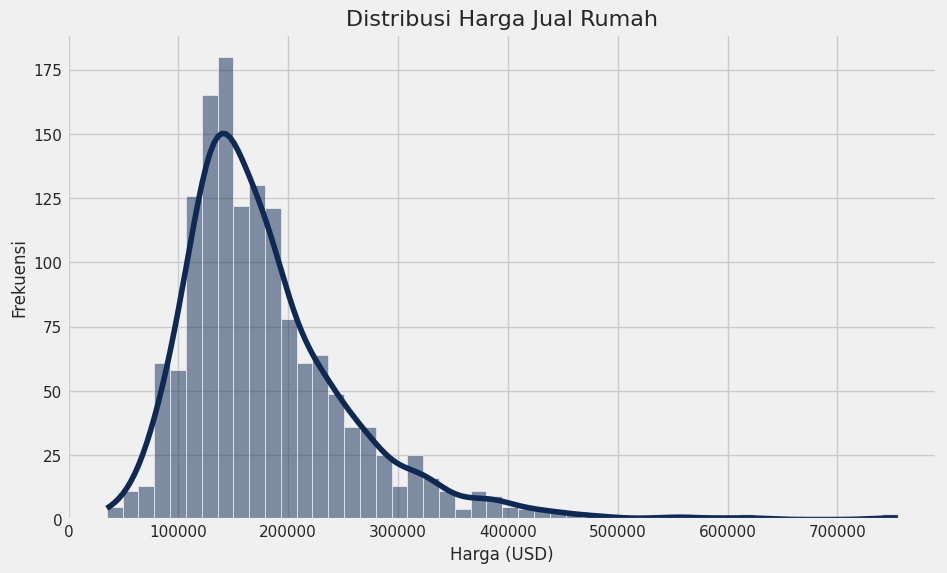

In [ ]:
# Melihat distribusi variabel target (SalePrice)
plt.figure(figsize=(10, 6))
sns.histplot(train_data['SalePrice'], kde=True, bins=50, color='#0E2954')
plt.title('Distribusi Harga Jual Rumah', fontsize=16)
plt.xlabel('Harga (USD)', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.show()

# **Data Preprocessing**

**Berdasarkan informasi umum yang telah kita peroleh, kita perlu melakukan beberapa transformasi pada data:**
* Mengecek dan menangani missing values
* Mengubah beberapa tipe data yang tidak sesuai
* Menangani outliers jika diperlukan

## **Pengecekan Missing Values**

In [ ]:
# Cek missing values pada data training
missing_train = train_data.isnull().sum()
print("Jumlah Missing Values pada Data Training:")
print(missing_train[missing_train > 0].sort_values(ascending=False))


Jumlah Missing Values pada Data Training:
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


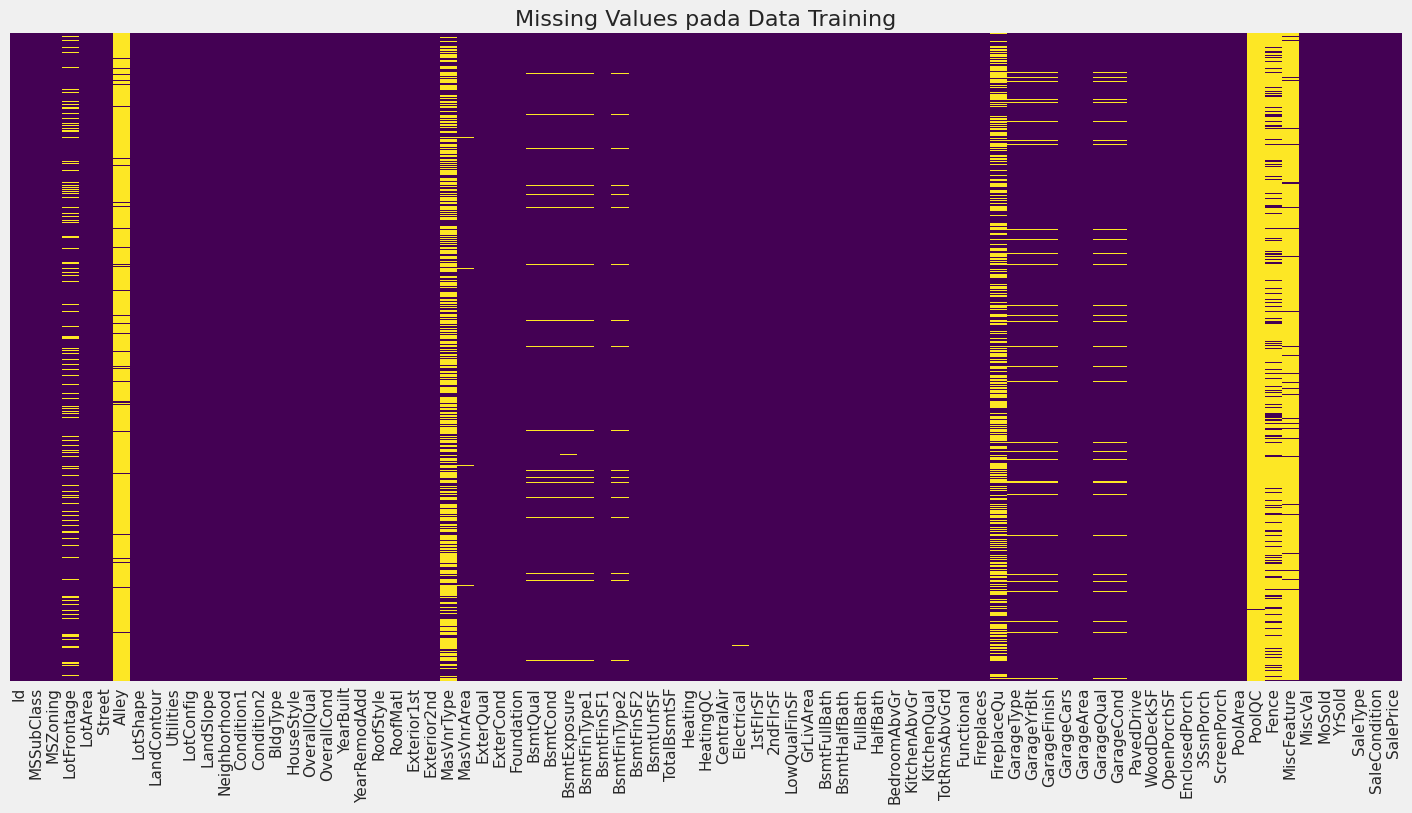

In [ ]:
plt.figure(figsize=(16, 8))
plt.title('Missing Values pada Data Training', fontsize=16)
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

## **Handling Missing Values**

Beberapa kolom memiliki nilai missing yang cukup banyak. Kita perlu menentukan strategi untuk menangani missing values tersebut:

- Untuk kolom seperti 'PoolQC', 'MiscFeature', 'Alley', 'Fence', nilai NA sebenarnya menunjukkan tidak adanya fitur tersebut, bukan data yang hilang.
- Untuk kolom numerik, kita bisa mengisi dengan nilai median atau mean.
- Untuk kolom kategorikal, kita bisa mengisi dengan modus atau kategori yang sesuai.


In [ ]:
# Simpan ID dan target dari train_data
train_ID = train_data['Id']
y_train = train_data['SalePrice']

# Buat salinan train_data tanpa kolom 'Id' dan 'SalePrice' untuk preprocessing
all_data = train_data.drop(['Id', 'SalePrice'], axis=1).copy()

In [ ]:
# Kategorikan kolom-kolom berdasarkan jenis missing values
# Kolom dimana NA berarti "Tidak Ada"
na_cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
           'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
           'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
           'MasVnrType']

# Isi nilai NA pada kolom-kolom tersebut dengan "None"
for col in na_cols:
    all_data[col].fillna('None', inplace=True)

In [ ]:
# Isi missing values pada kolom numerik yang berhubungan dengan area
# Kebanyakan nilai NA disini berarti 0 (tidak ada)
area_cols = ['GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
             'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'MasVnrArea']

for col in area_cols:
    all_data[col].fillna(0, inplace=True)

In [ ]:
# Cek missing values yang tersisa
remaining_missing = all_data.isnull().sum()
print("Jumlah Missing Values yang Tersisa:")
print(remaining_missing[remaining_missing > 0].sort_values(ascending=False))


Jumlah Missing Values yang Tersisa:
LotFrontage    259
Electrical       1
dtype: int64


In [ ]:
# Untuk kolom LotFrontage, kita pakai median per neighborhood
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median()))

# MSZoning - isi dengan modus
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

# Utilities - isi dengan modus
all_data['Utilities'] = all_data['Utilities'].fillna(all_data['Utilities'].mode()[0])

# Exterior1st dan Exterior2nd - isi dengan modus
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

# KitchenQual - isi dengan modus
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

# Functional - isi dengan modus
all_data['Functional'] = all_data['Functional'].fillna('Typ')  # Typical functionality

# SaleType - isi dengan modus
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

# Electrical - isi dengan modus
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])


In [ ]:
# Cek missing values setelah handling
remaining_missing = all_data.isnull().sum()
print("Jumlah Missing Values Setelah Handling:")
print(remaining_missing[remaining_missing > 0].sort_values(ascending=False))


Jumlah Missing Values Setelah Handling:
Series([], dtype: int64)


## **Handling Duplicated Data**

Selanjutnya, kita perlu memeriksa apakah terdapat data duplikat dalam dataset kita. Data duplikat bisa menyebabkan bias dalam model dan analisis kita.

In [ ]:
# Periksa data duplikat pada data training
duplicate_train = train_data.duplicated().sum()
print(f"Jumlah data duplikat pada data training: {duplicate_train}")


Jumlah data duplikat pada data training: 0


## **Deteksi Outliers**

Selanjutnya kita akan memeriksa apakah terdapat outliers dalam data, terutama pada variabel target kita (SalePrice).

In [ ]:
# Import library untuk visualisasi
import plotly.express as px

# Fitur-fitur utama untuk deteksi outlier
key_features_outlier = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'YearBuilt', 'YearRemodAdd']

# Definisikan warna yang digunakan
color = ['#ff6d00', '#ff8500', '#ff9e00', '#240046', '#5a189a', '#9d4edd']

# Dictionary untuk nama fitur yang lebih deskriptif
descriptive_names_outlier = {
    'OverallQual': 'Kualitas Material dan Finishing Rumah',
    'GrLivArea': 'Luas Area Tinggal di Atas Tanah (sq.ft)',
    'TotalBsmtSF': 'Total Luas Basement (sq.ft)',
    'GarageArea': 'Luas Garasi (sq.ft)',
    'YearBuilt': 'Tahun Pembangunan Rumah',
    'YearRemodAdd': 'Tahun Renovasi Terakhir'
}

for i in range(len(key_features_outlier)):
    # Create the horizontal box plot
    fig = px.box(
        train_data,
        x=key_features_outlier[i],
        orientation='h',
        color_discrete_sequence=[color[i % len(color)]]
    )

    # Update layout and display the plot
    fig.update_layout(
        title=f'<b>Deteksi Outlier pada {descriptive_names_outlier[key_features_outlier[i]]}</b>',
        yaxis=dict(
            title='',
            showgrid=False,
            showline=False,
            showticklabels=False,
            zeroline=False,
        ),
        xaxis=dict(
            title=descriptive_names_outlier[key_features_outlier[i]],
            showgrid=False,
            showline=True,
            showticklabels=True,
            zeroline=False,
        )
    )

    fig.show()

In [ ]:
# Histogram dengan boxplot untuk SalePrice
import plotly.express as px

fig = px.histogram(
    train_data,
    x='SalePrice',
    marginal='box',
    color_discrete_sequence=['#0E2954'],
    nbins=50
)

fig.update_traces(
    marker_line_width=1,
    marker_line_color='white'
)

fig.update_layout(
    plot_bgcolor='rgba(0, 0, 0, 0)',
    title=dict(
        text="<b>Distribusi <span style='color:#0E2954'>Harga Jual</b>",
        font=dict(
            size=28,
            color='#757882'
        ),
        y=0.92,
        x=0.5
    ),
    yaxis=dict(
        title='',
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
    ),
    margin=dict(
        t=80,
        b=10,
        r=20
    )
)

fig.show()

In [ ]:
# Deteksi outlier pada GrLivArea
import plotly.express as px

fig = px.histogram(
    train_data,
    x='GrLivArea',
    marginal='box',
    color_discrete_sequence=['#0E2954'],
    nbins=50
)

fig.update_traces(
    marker_line_width=1,
    marker_line_color='white'
)

fig.update_layout(
    plot_bgcolor='rgba(0, 0, 0, 0)',
    title=dict(
        text="<b>Distribusi <span style='color:#0E2954'>Living Area</b>",
        font=dict(
            size=28,
            color='#757882'
        ),
        y=0.92,
        x=0.5
    ),
    yaxis=dict(
        title='',
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
    ),
    margin=dict(
        t=80,
        b=10,
        r=20
    )
)

fig.show()

## **Handling Outlier**

In [ ]:
# Fungsi untuk mengidentifikasi outlier menggunakan metode IQR (Interquartile Range)
def identify_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]

    return outliers, lower_bound, upper_bound

# Fungsi untuk mengidentifikasi outlier menggunakan Z-score
def identify_outliers_zscore(df, column, threshold=3):
    z_scores = np.abs(stats.zscore(df[column].dropna()))
    outlier_indices = np.where(z_scores > threshold)[0]
    outliers = df[column].iloc[outlier_indices]

    return outliers

# Fungsi untuk menangani outlier
def handle_outliers(df, column, method='cap', detection_method='iqr'):
    df_copy = df.copy()

    if detection_method == 'iqr':
        outliers, lower_bound, upper_bound = identify_outliers_iqr(df_copy, column)
    elif detection_method == 'zscore':
        # Untuk zscore, kita perlu memperkirakan bounds
        mean = df_copy[column].mean()
        std = df_copy[column].std()
        threshold = 3
        lower_bound = mean - threshold * std
        upper_bound = mean + threshold * std
        outliers = identify_outliers_zscore(df_copy, column, threshold)

    if method == 'cap':
        # Capping: mengganti outlier dengan nilai batas
        df_copy[column] = df_copy[column].clip(lower=lower_bound, upper=upper_bound)
    elif method == 'remove':
        # Menghapus baris dengan outlier
        if detection_method == 'iqr':
            df_copy = df_copy[(df_copy[column] >= lower_bound) & (df_copy[column] <= upper_bound)]
        else:
            outlier_indices = outliers.index
            df_copy = df_copy.drop(outlier_indices)
    elif method == 'impute_mean':
        # Mengganti outlier dengan rata-rata
        mean_value = df_copy[(df_copy[column] >= lower_bound) & (df_copy[column] <= upper_bound)][column].mean()
        df_copy.loc[(df_copy[column] < lower_bound) | (df_copy[column] > upper_bound), column] = mean_value
    elif method == 'impute_median':
        # Mengganti outlier dengan median
        median_value = df_copy[(df_copy[column] >= lower_bound) & (df_copy[column] <= upper_bound)][column].median()
        df_copy.loc[(df_copy[column] < lower_bound) | (df_copy[column] > upper_bound), column] = median_value

    return df_copy

# Fungsi untuk visualisasi outlier dengan boxplot
def visualize_outliers(df, column, title=None):
    plt.figure(figsize=(10, 6))

    plt.subplot(1, 2, 1)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot {descriptive_names.get(column, column)}')

    plt.subplot(1, 2, 2)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribusi {descriptive_names.get(column, column)}')

    if title:
        plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Fungsi untuk menangani outlier pada semua kolom numerik
def handle_all_numeric_outliers(df, columns, method='cap', detection_method='iqr', visualize=True):
    df_cleaned = df.copy()
    results = {}

    for column in columns:
        # Skip kolom yang tidak ingin diproses (misalnya ID atau timestamp)
        if column in ['Id', 'MoSold', 'YrSold', 'YearBuilt', 'YearRemodAdd']:
            continue

        # Tampilkan distribusi data sebelum handling outlier
        if visualize:
            visualize_outliers(df_cleaned, column, f'Sebelum handling outlier - {descriptive_names.get(column, column)}')

        # Identifikasi outlier
        if detection_method == 'iqr':
            outliers, _, _ = identify_outliers_iqr(df_cleaned, column)
        else:
            outliers = identify_outliers_zscore(df_cleaned, column)

        # Simpan informasi outlier
        results[column] = {
            'jumlah_outlier': len(outliers),
            'persentase_outlier': len(outliers) / len(df_cleaned) * 100
        }

        # Handle outlier jika ada
        if len(outliers) > 0:
            df_cleaned = handle_outliers(df_cleaned, column, method, detection_method)

            # Tampilkan distribusi data setelah handling outlier
            if visualize:
                visualize_outliers(df_cleaned, column, f'Setelah handling outlier - {descriptive_names.get(column, column)}')

    # Tampilkan hasil identifikasi outlier
    result_df = pd.DataFrame.from_dict(results, orient='index')
    print("Hasil identifikasi outlier:")
    print(result_df.sort_values(by='jumlah_outlier', ascending=False))

    return df_cleaned, result_df

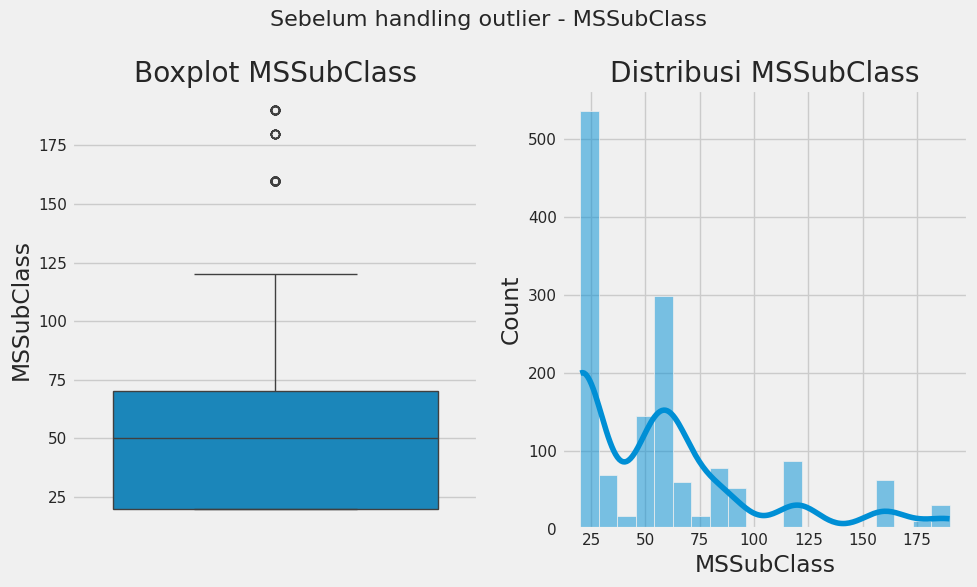

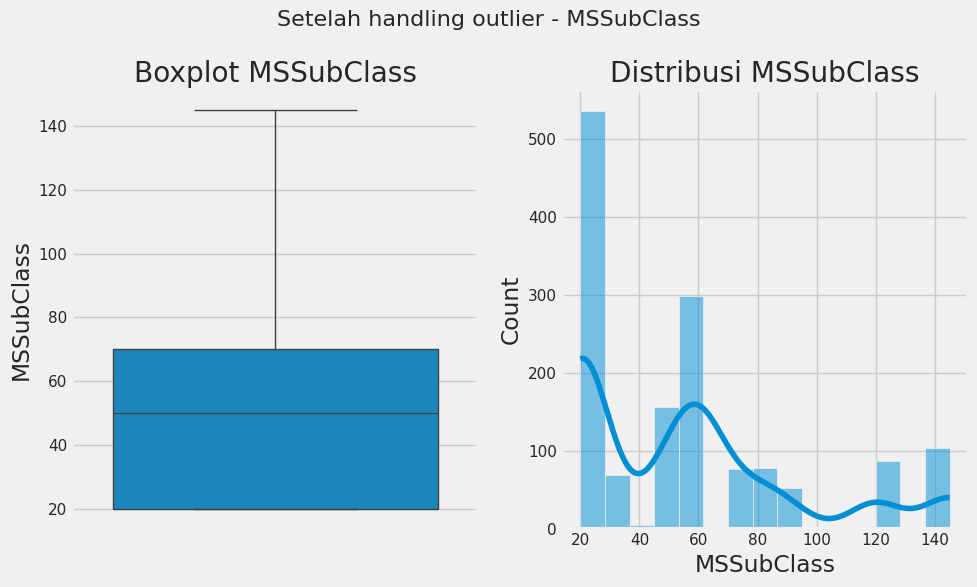

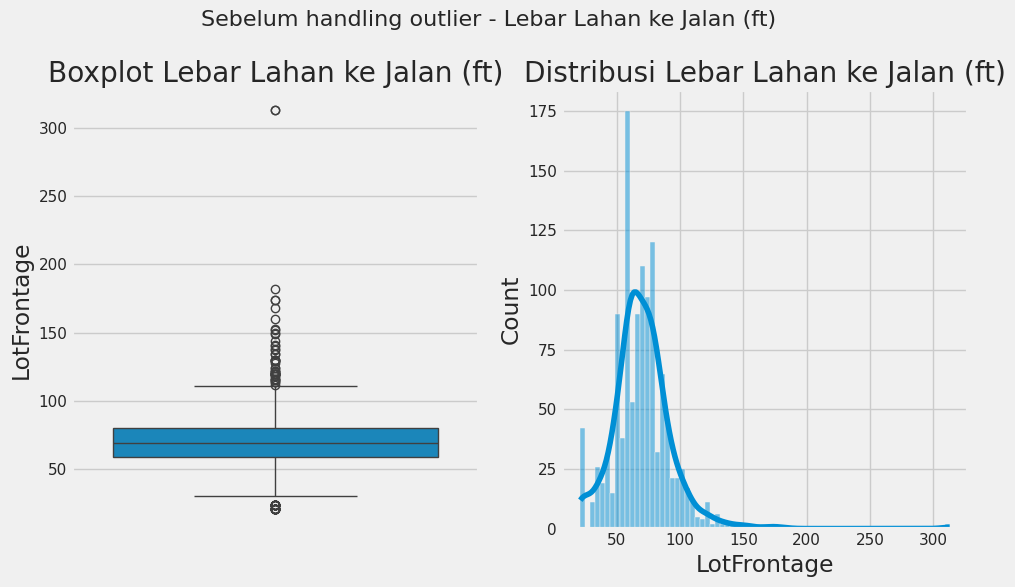

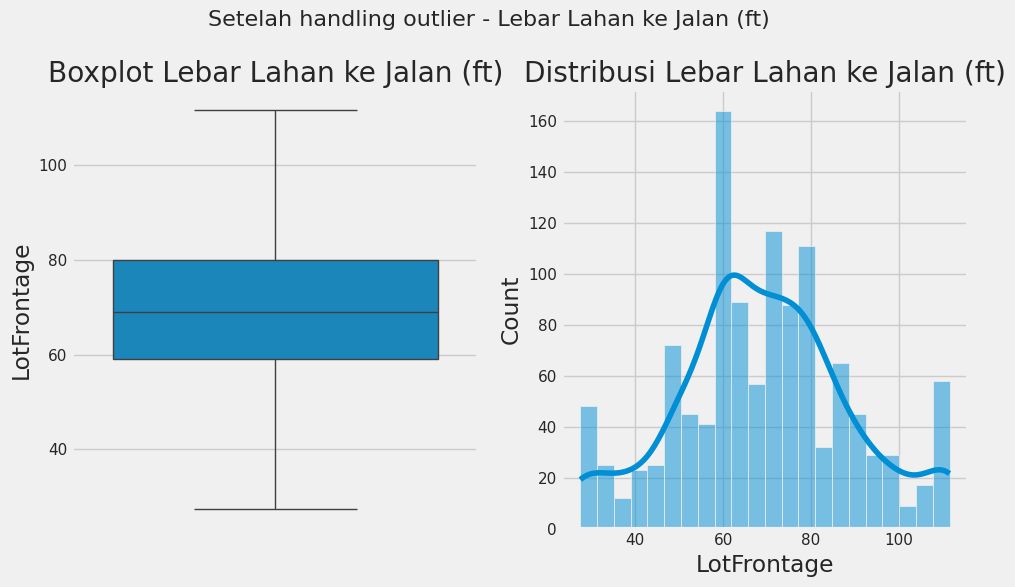

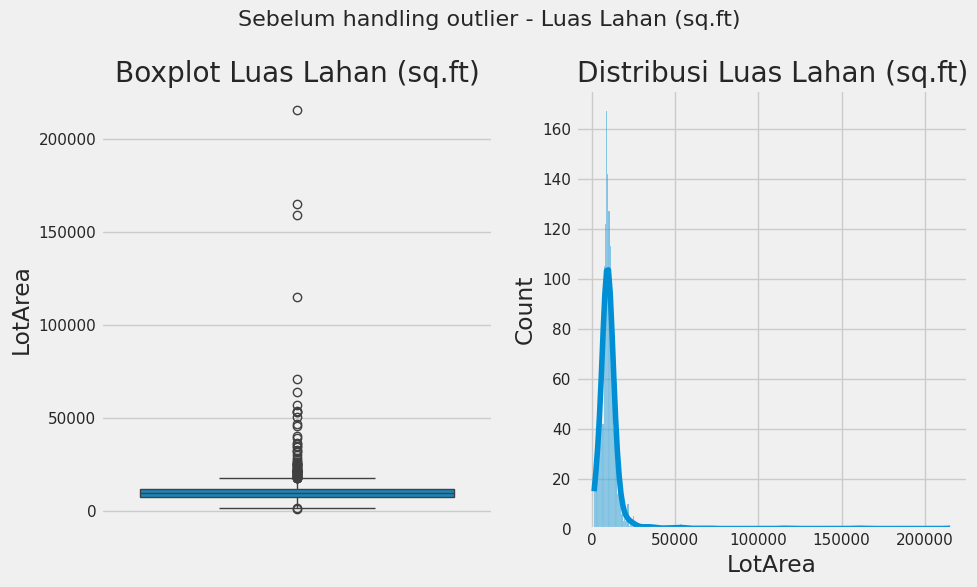

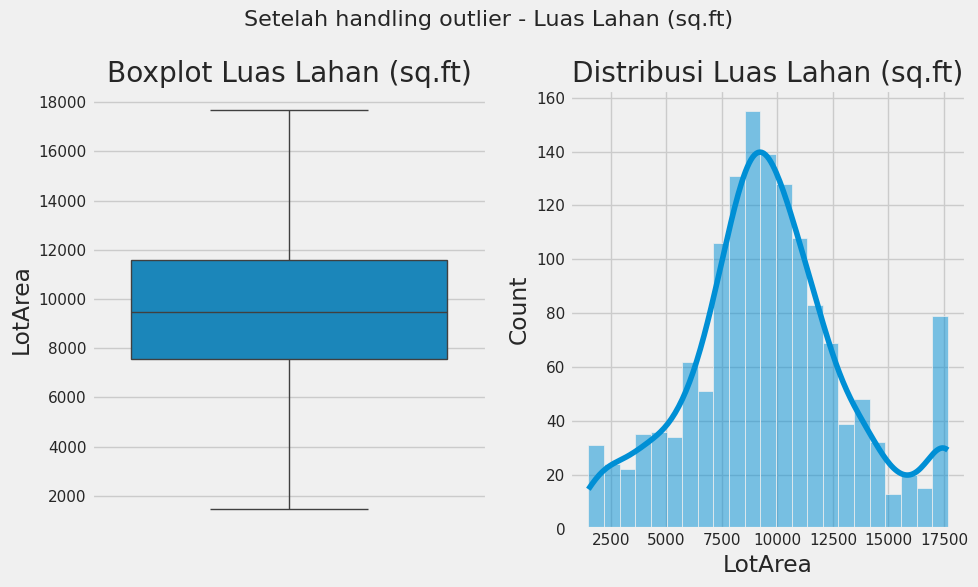

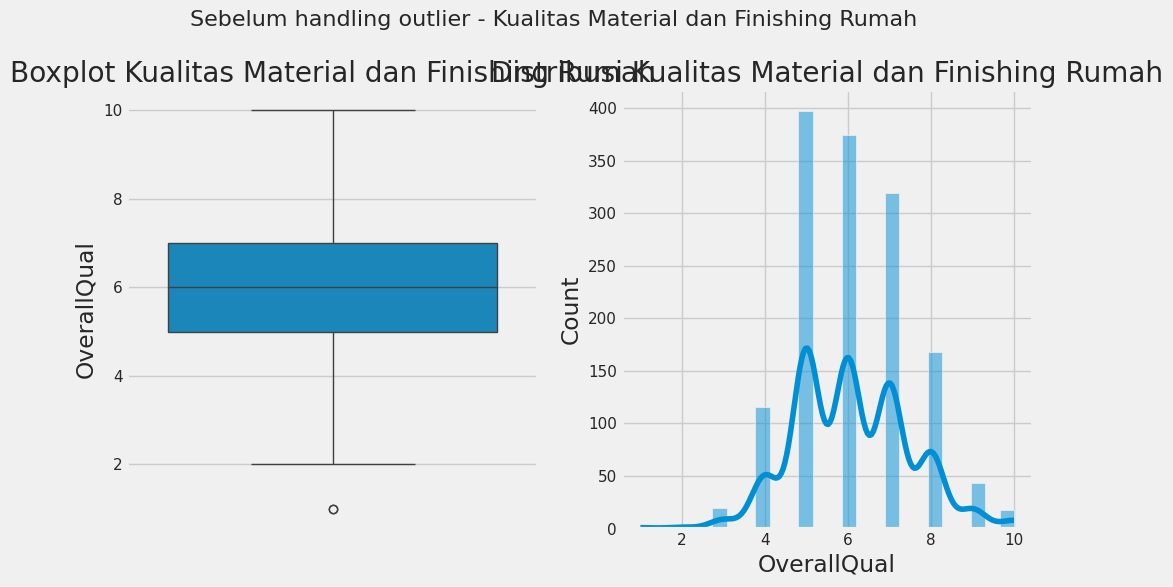

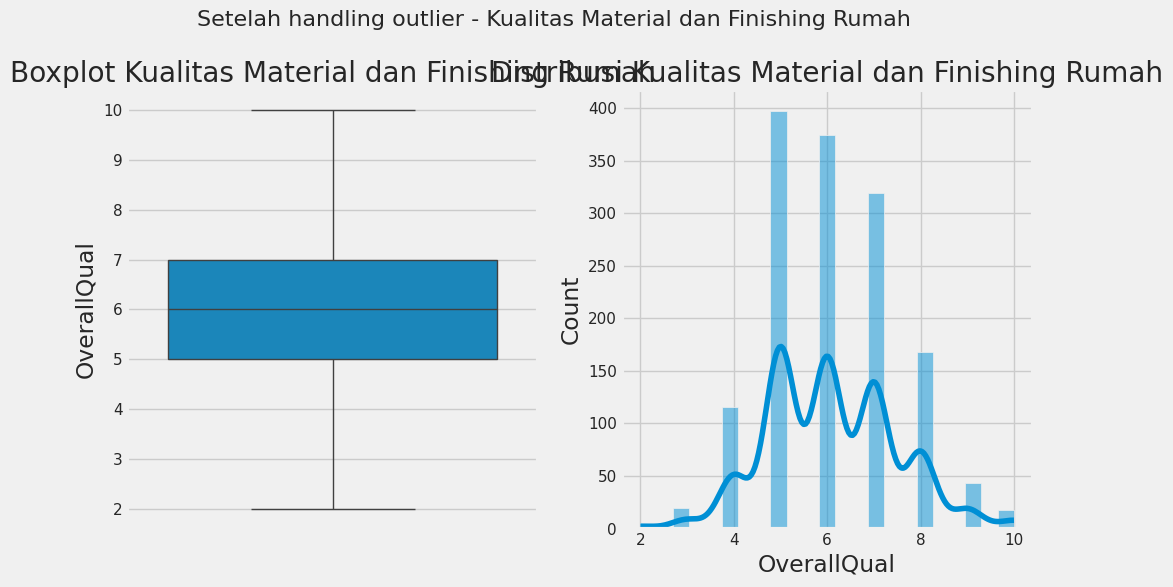

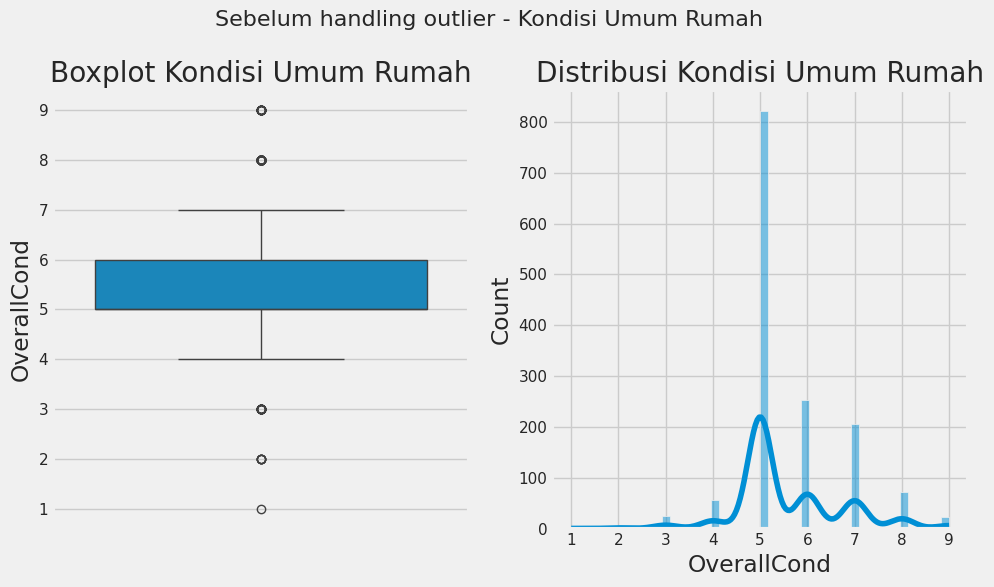

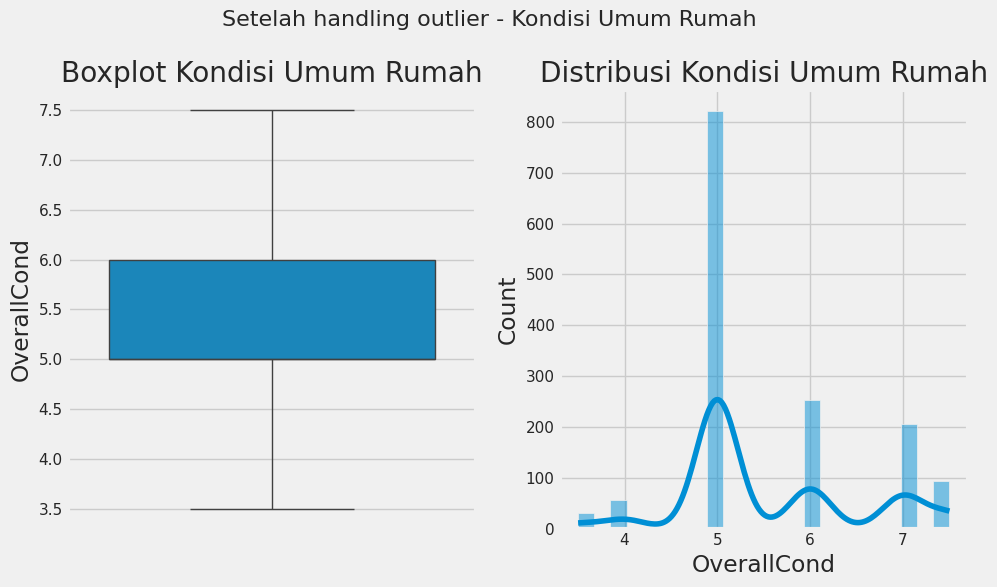

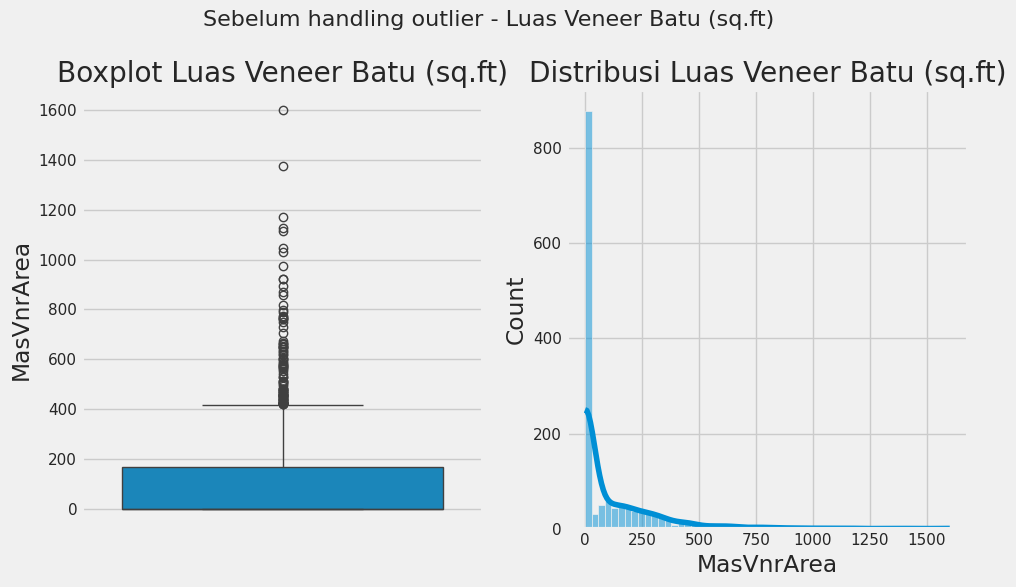

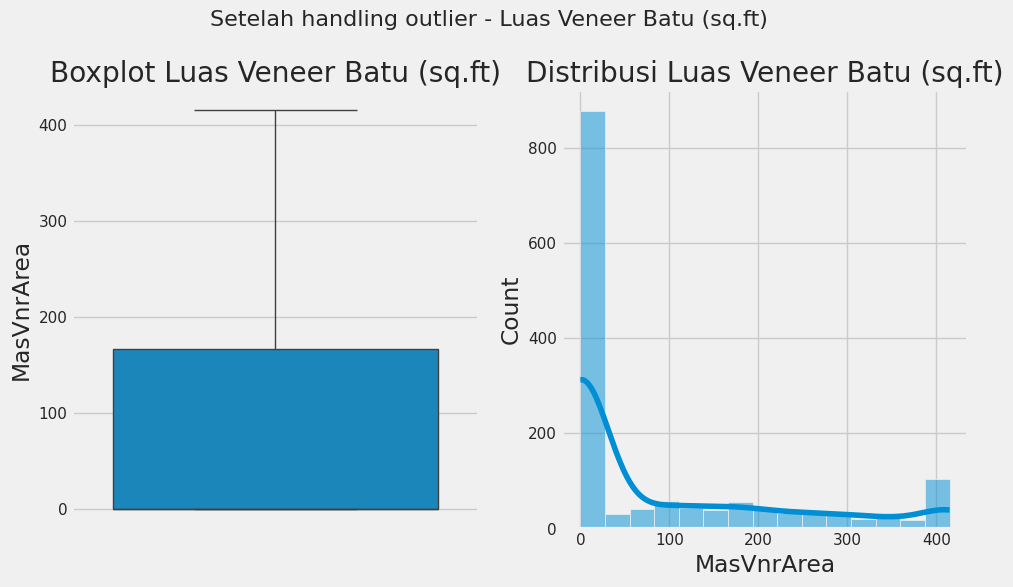

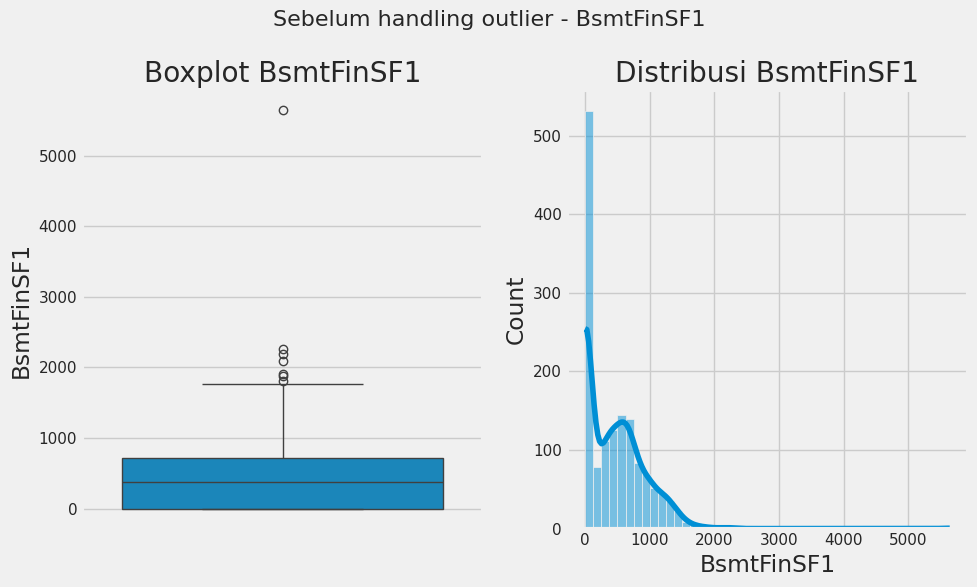

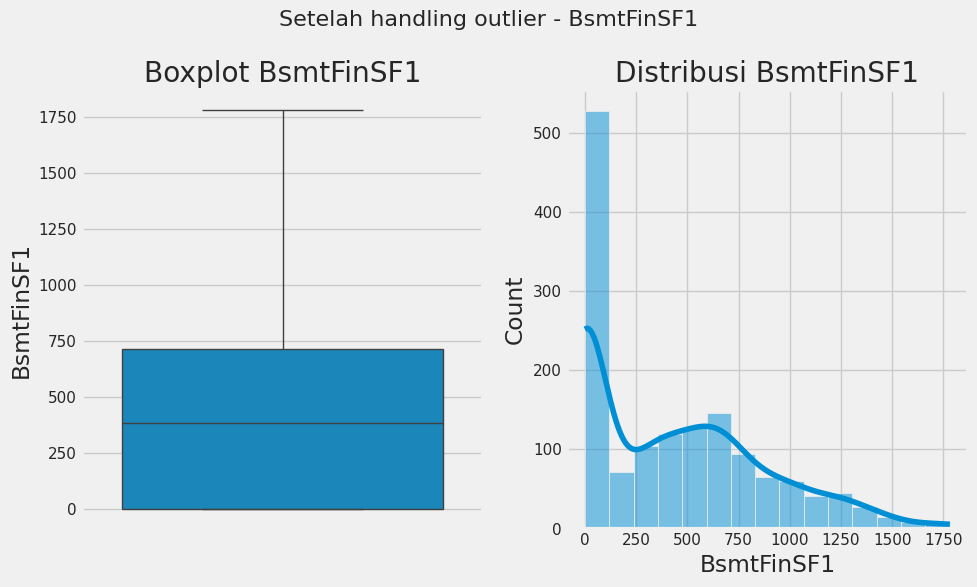

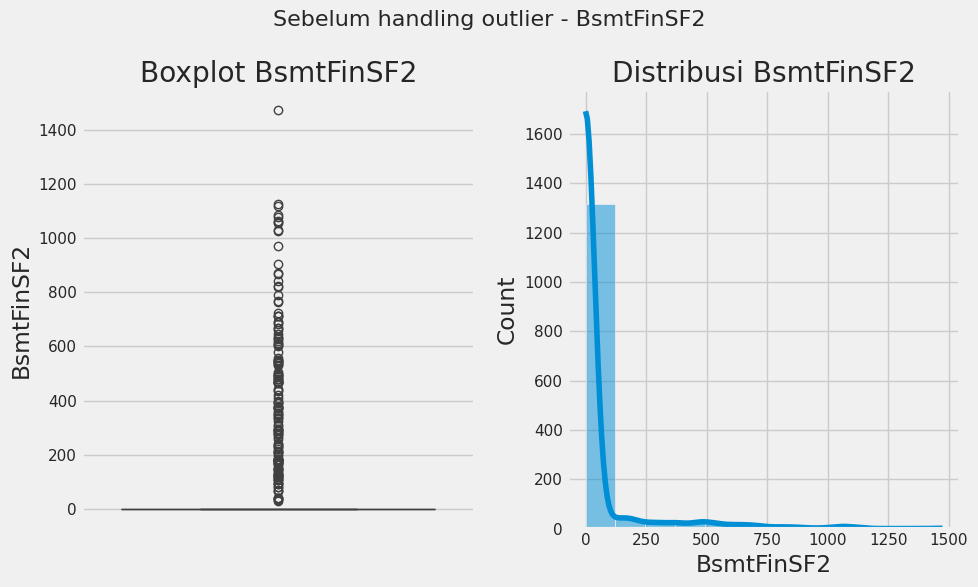

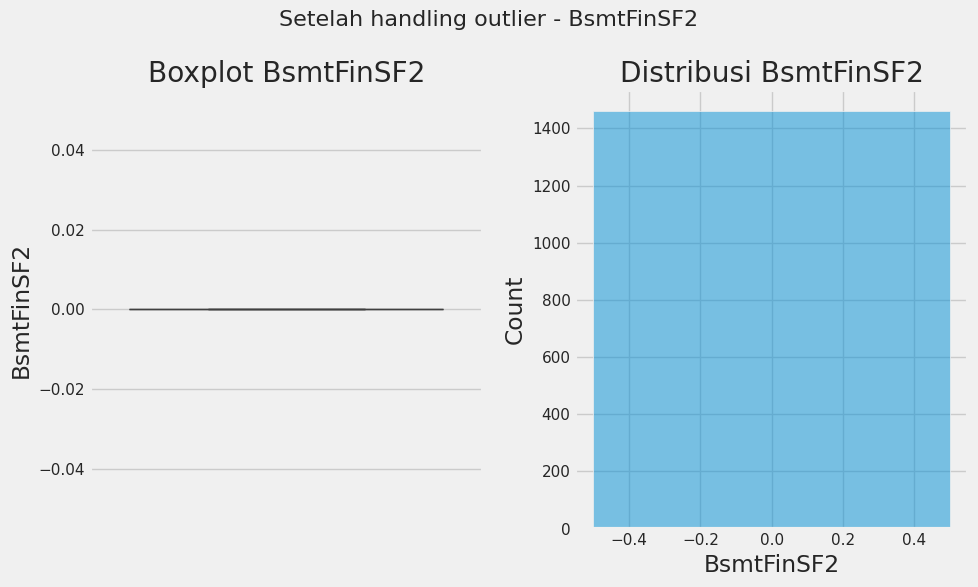

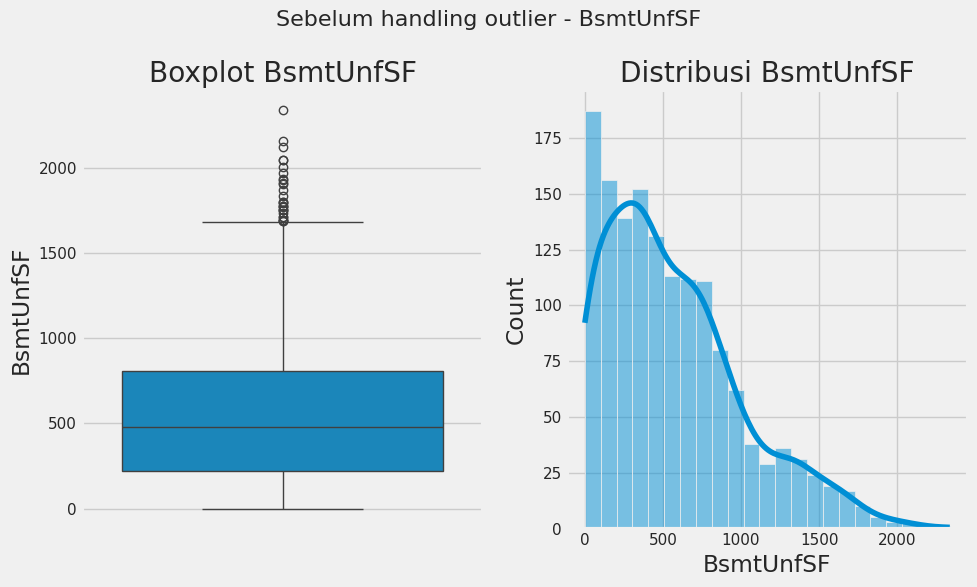

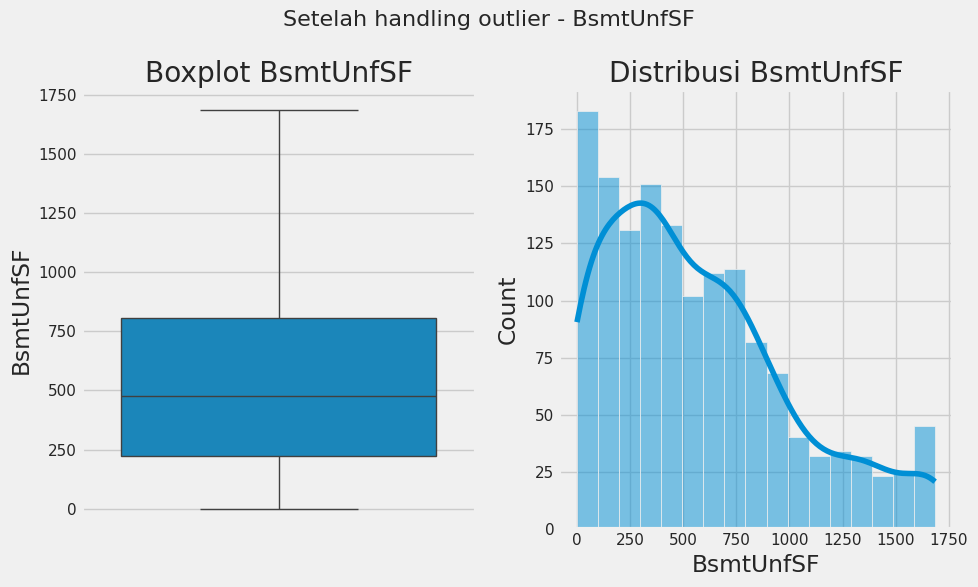

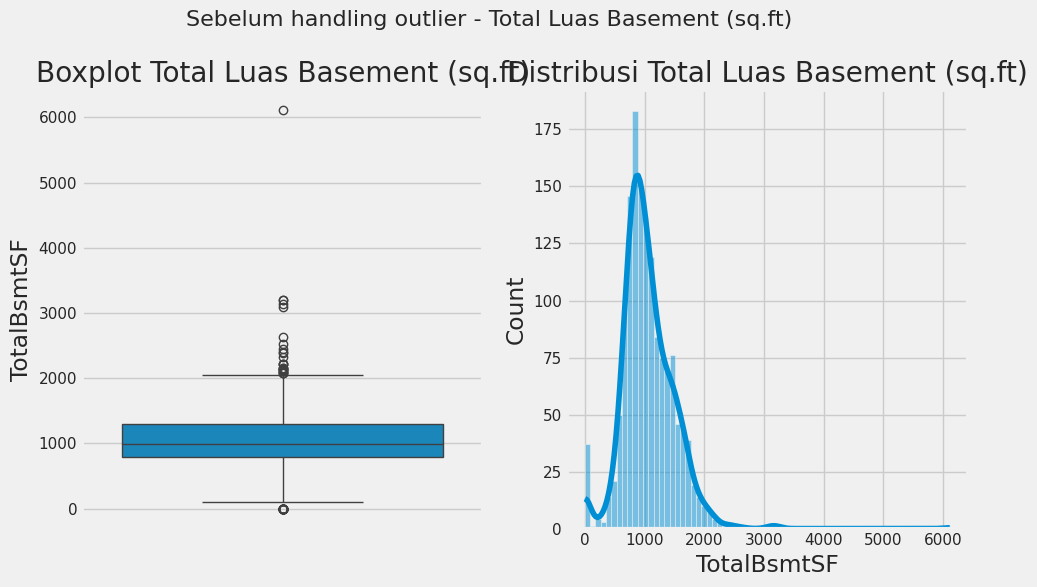

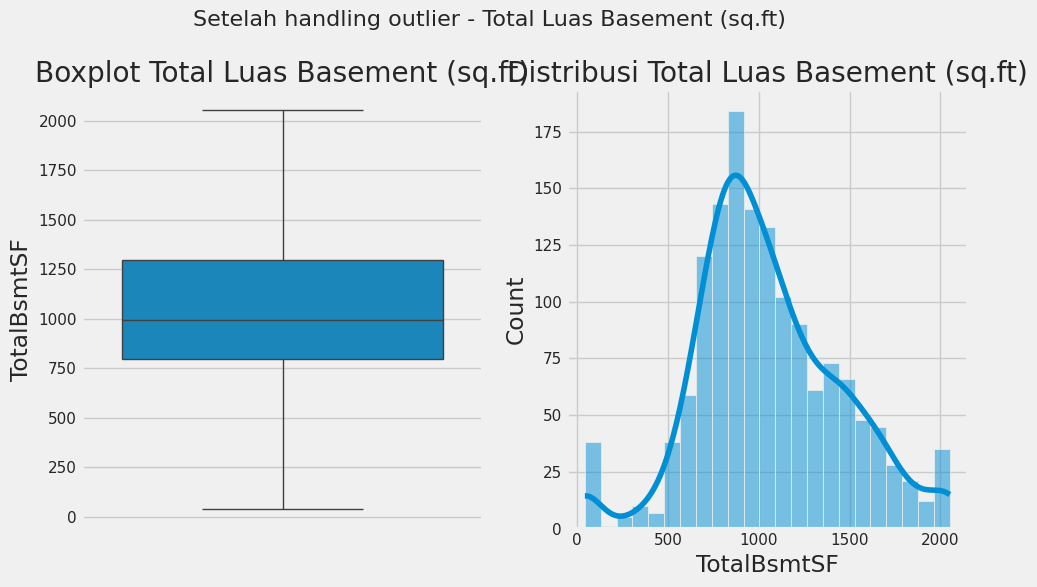

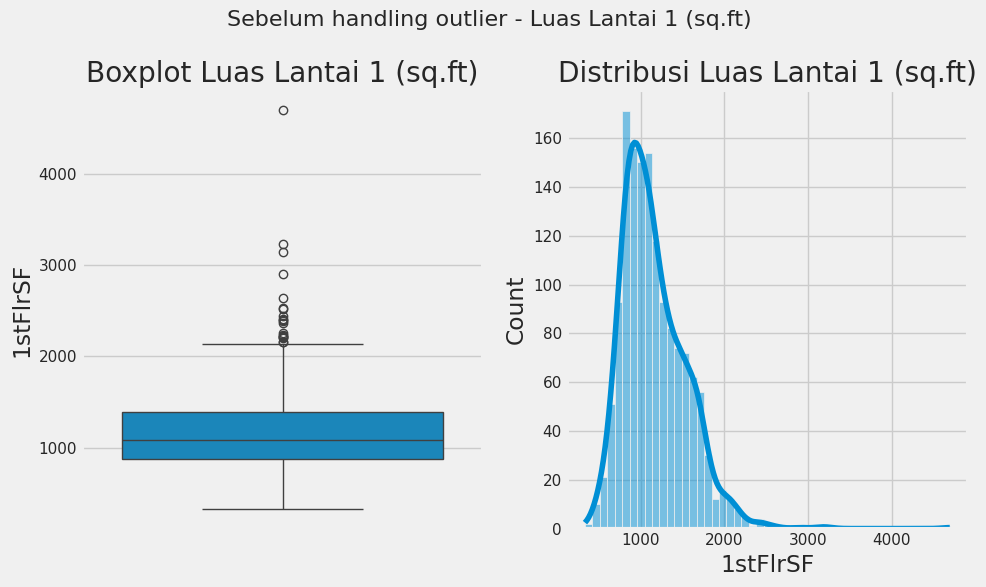

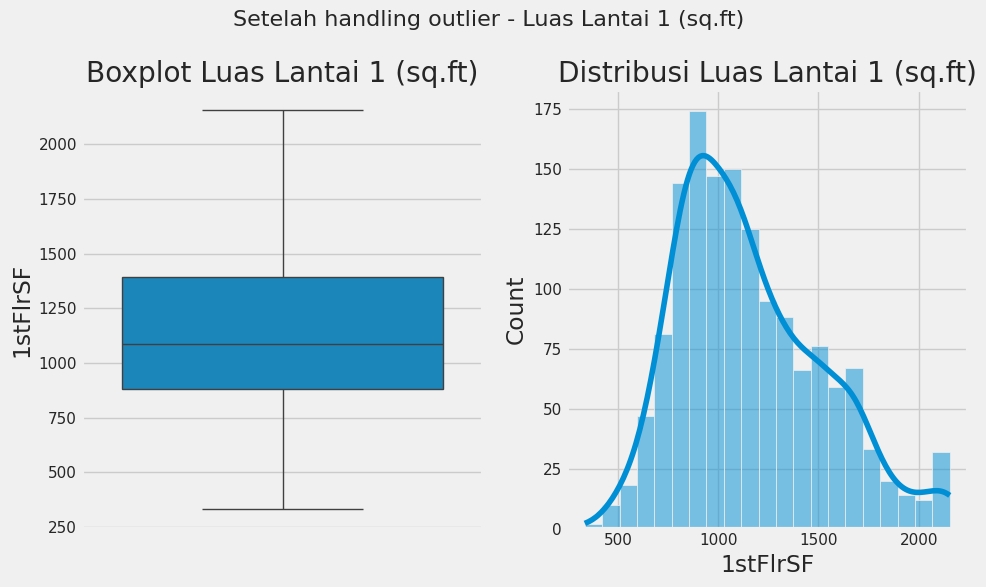

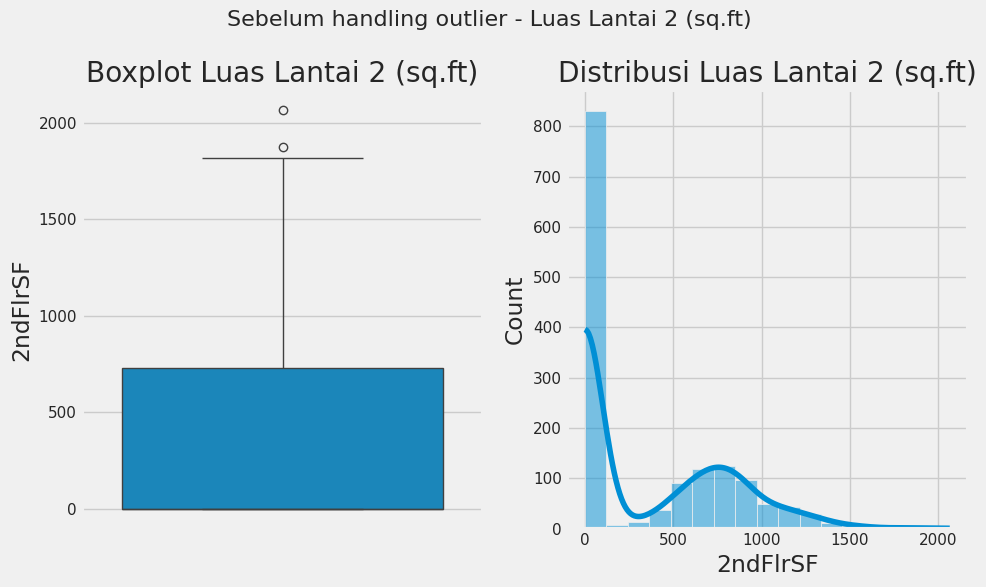

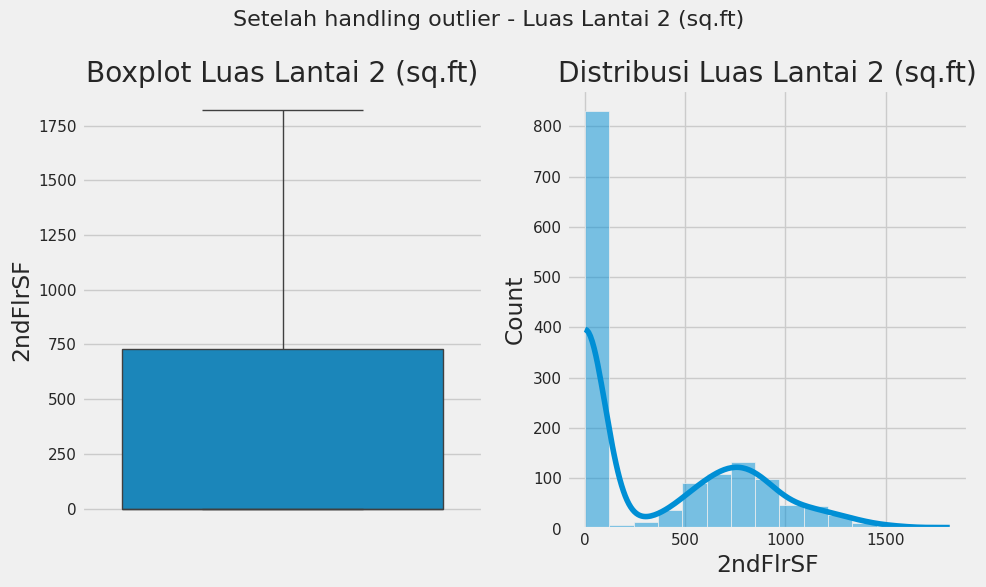

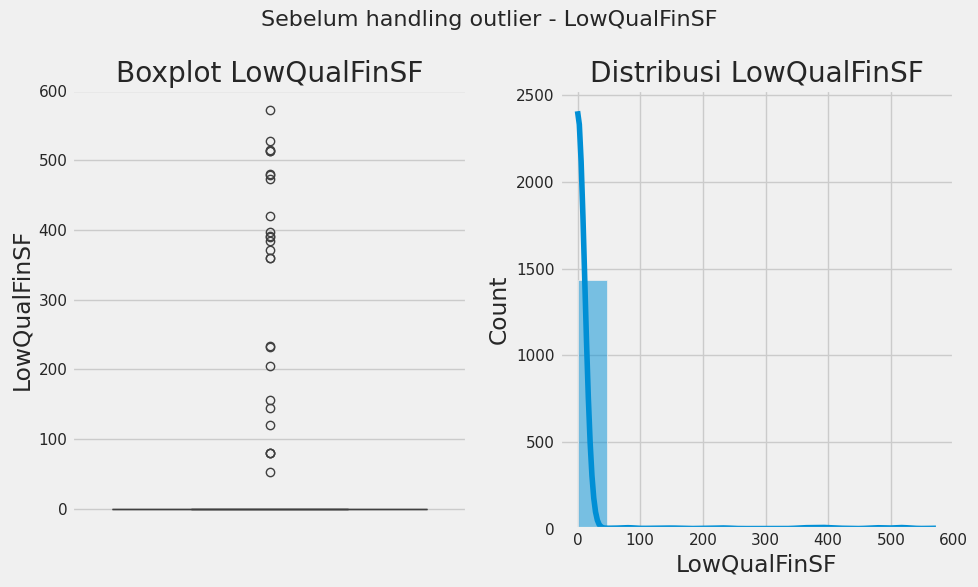

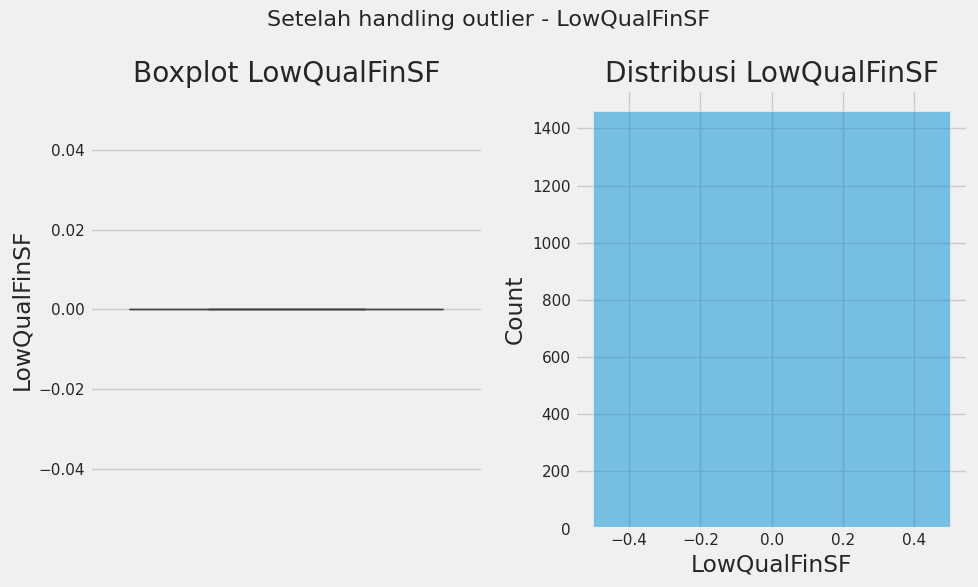

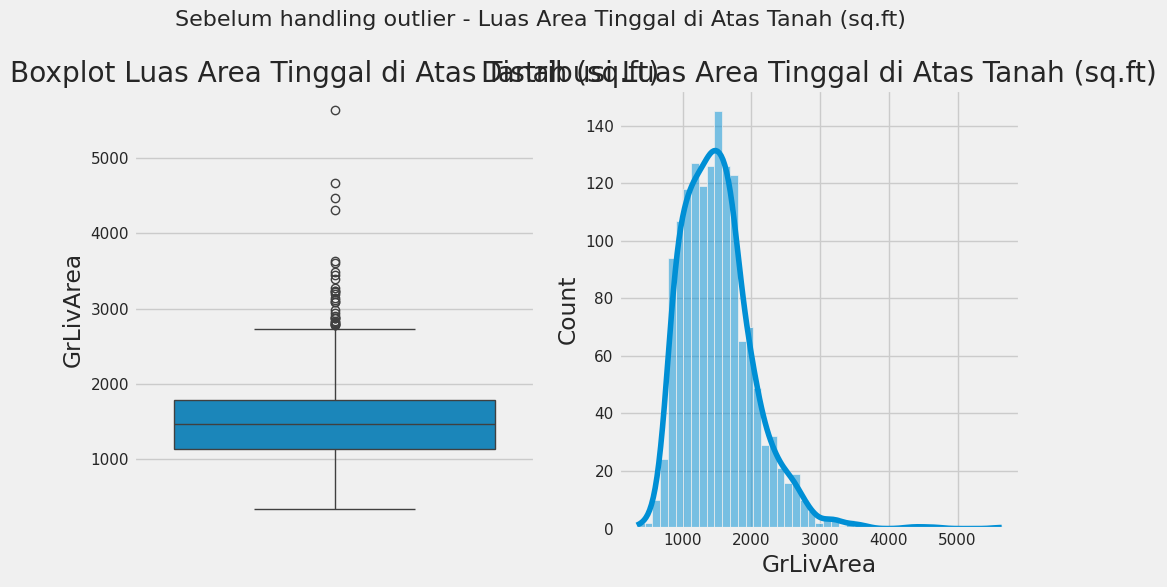

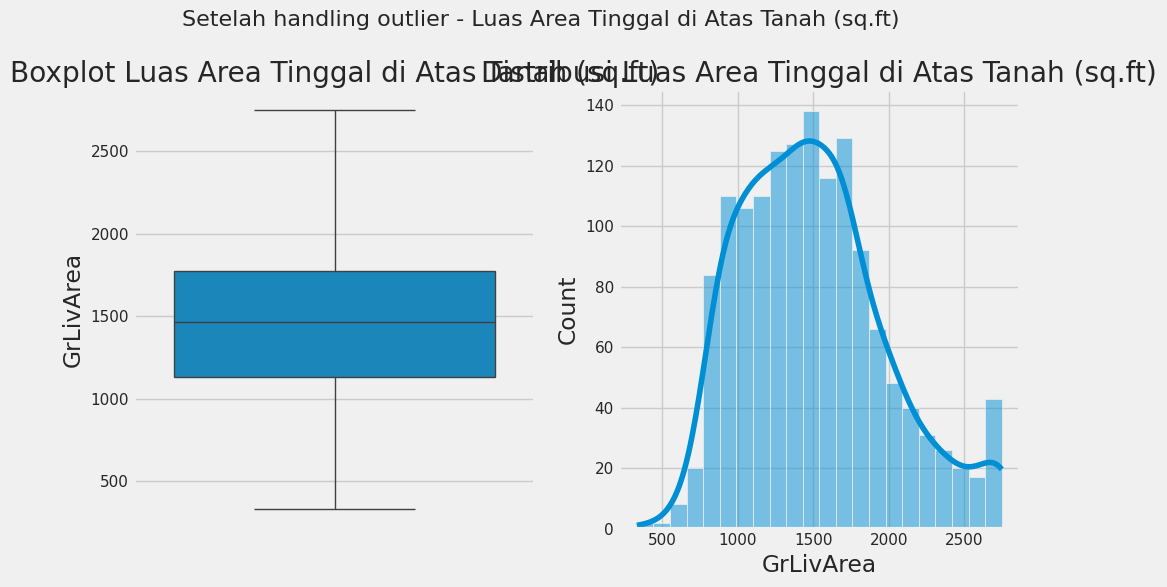

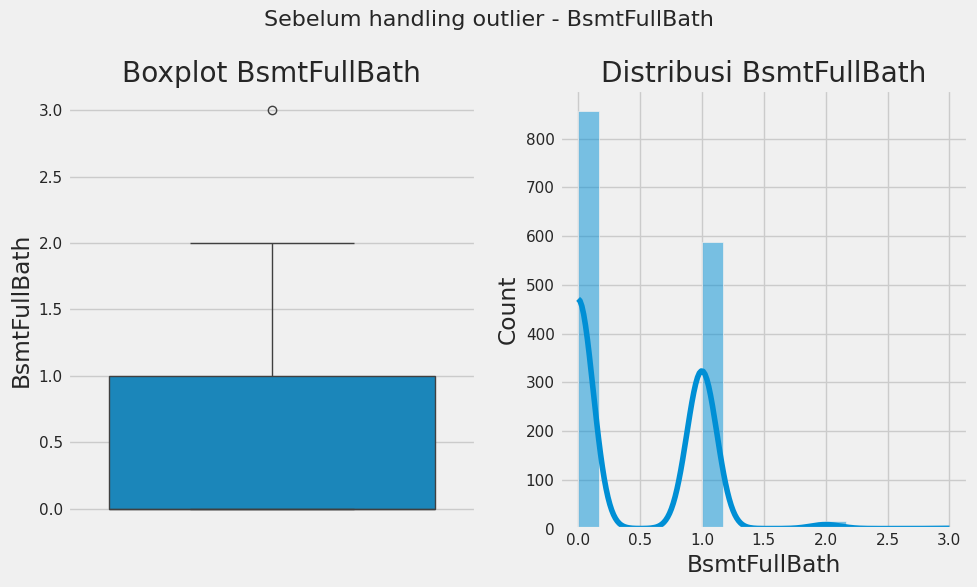

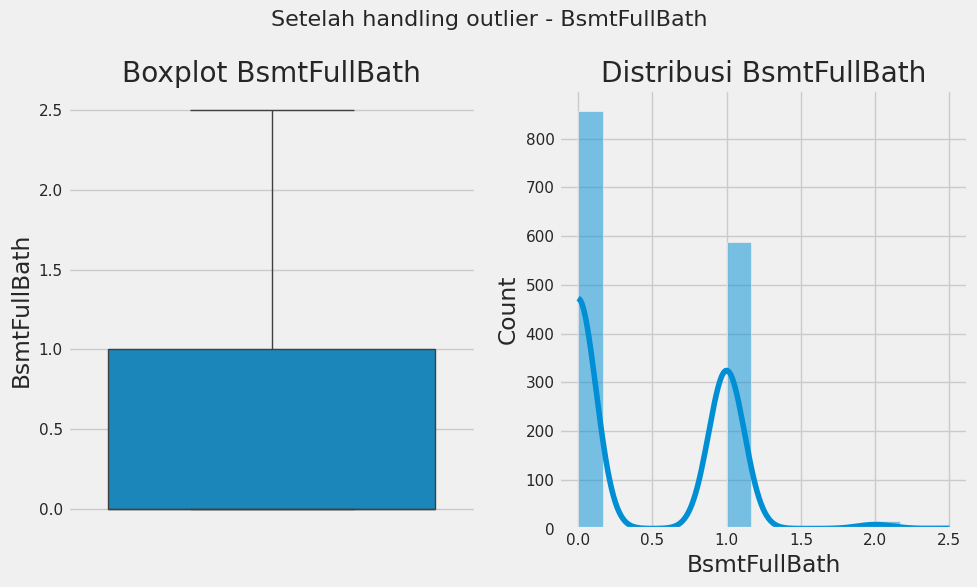

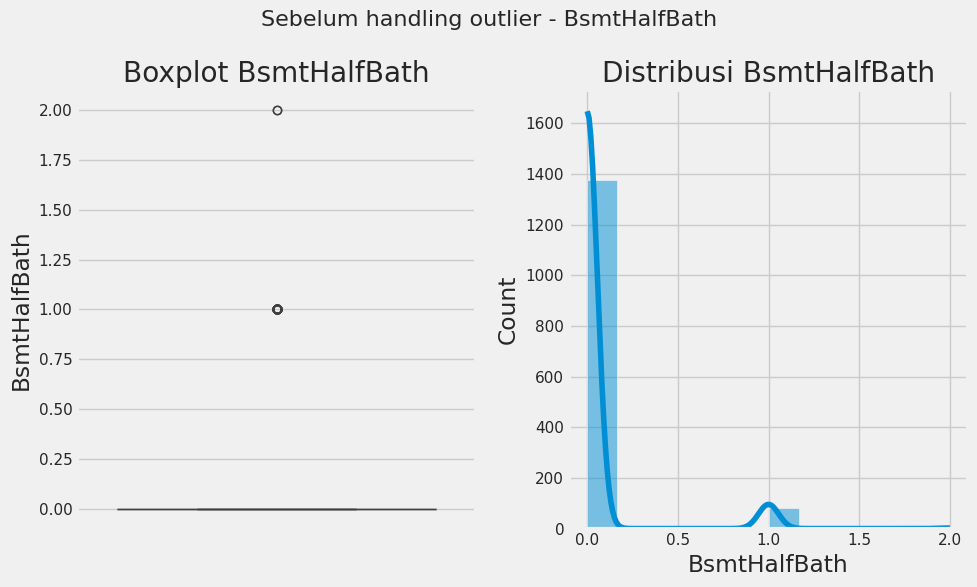

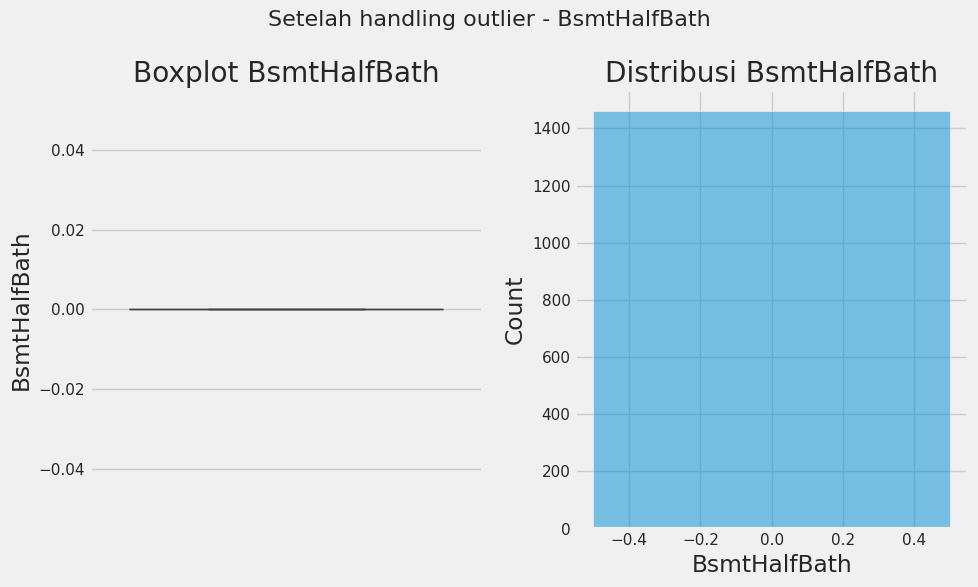

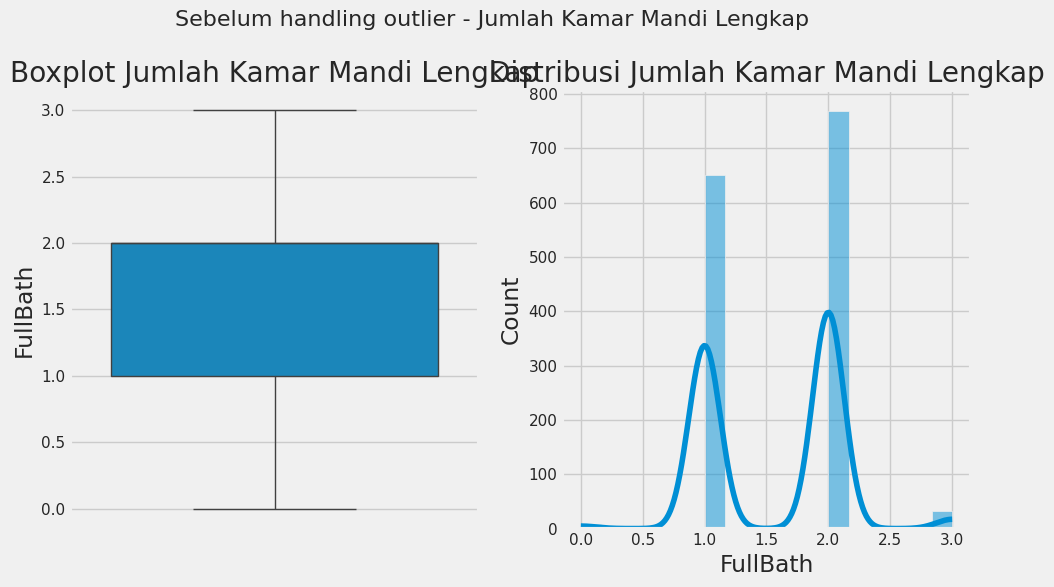

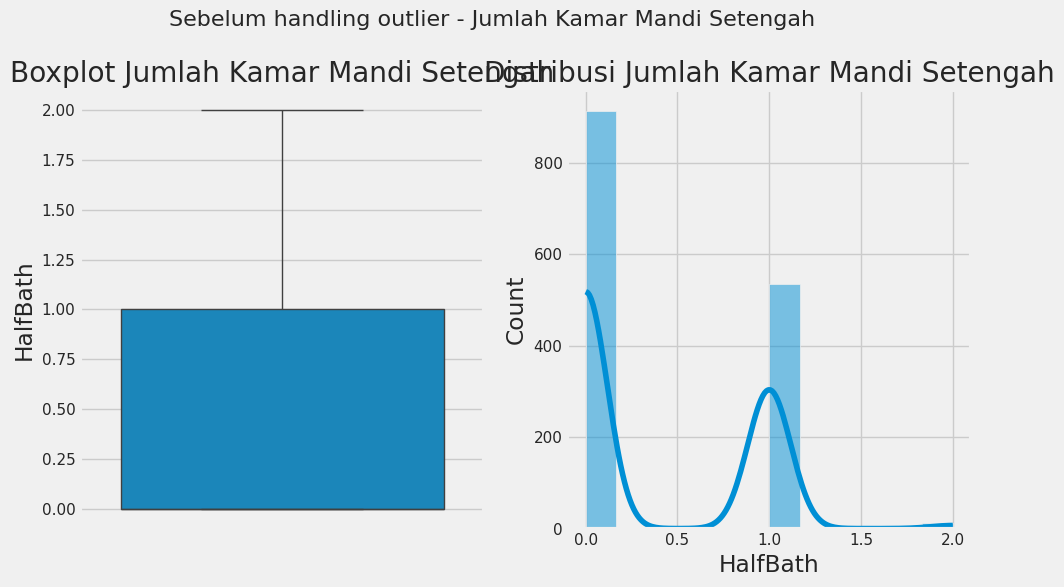

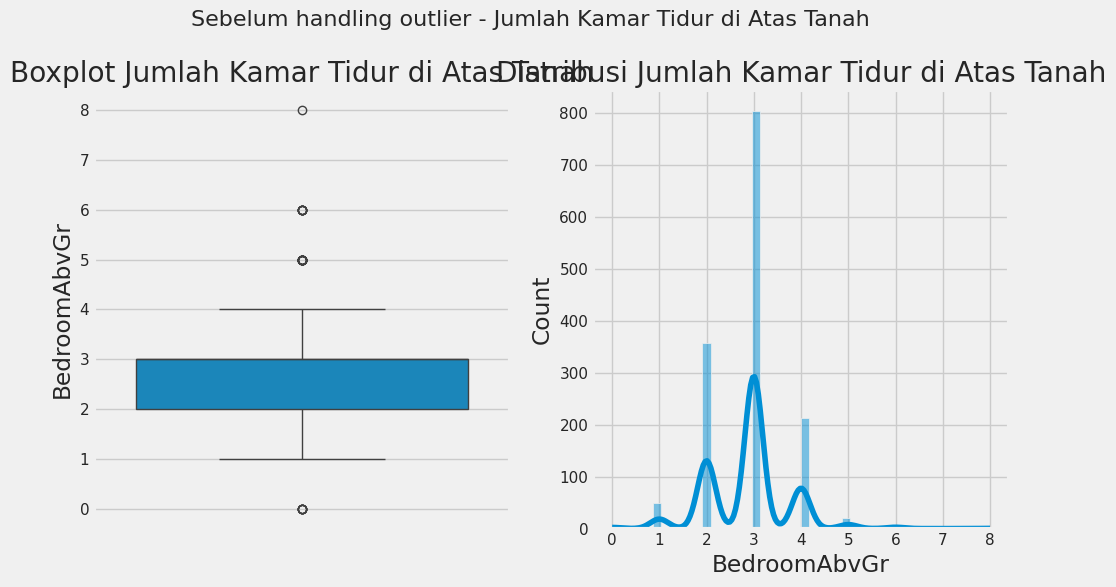

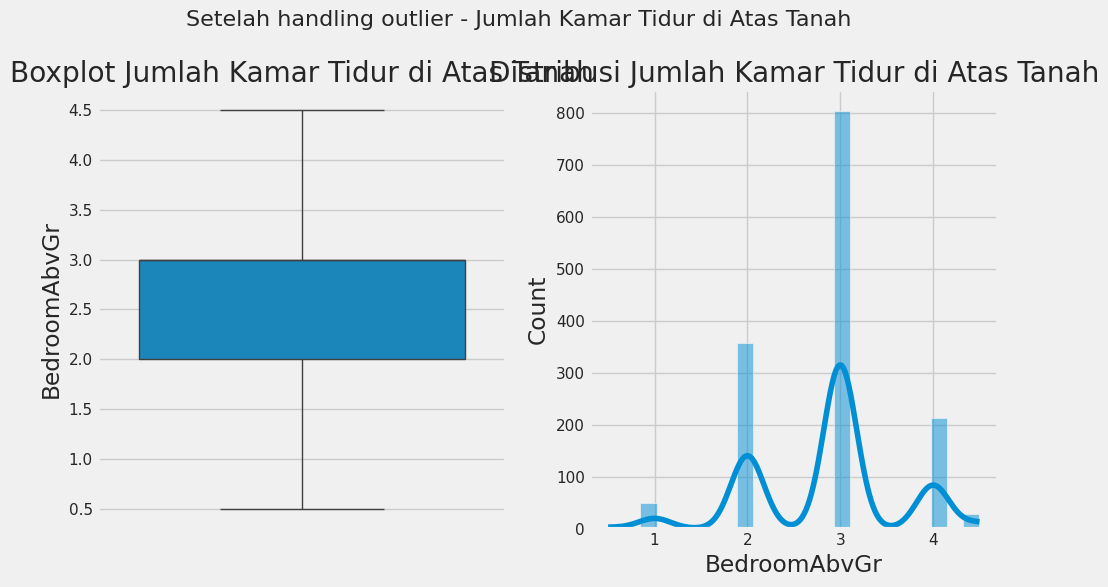

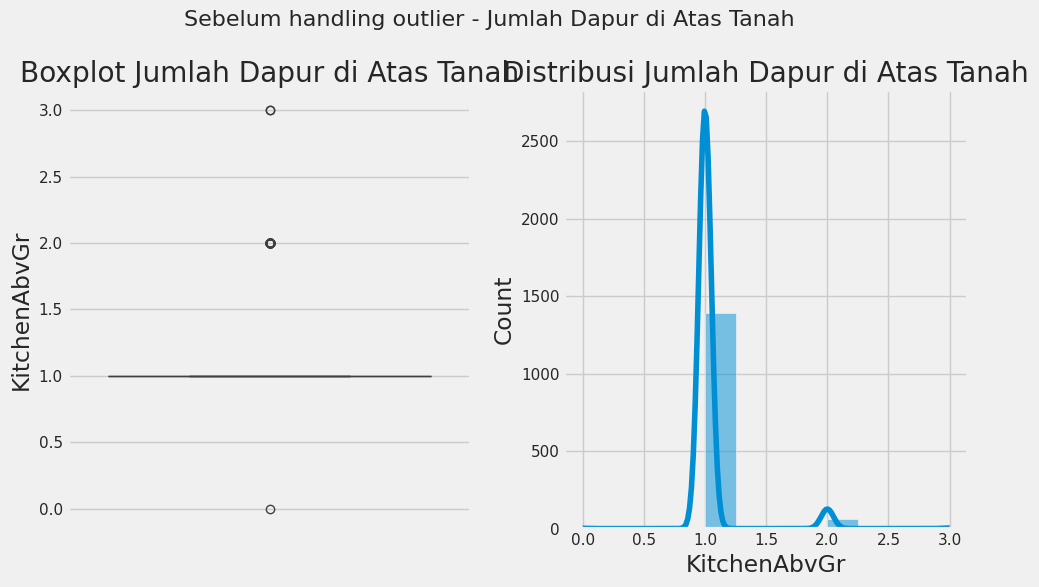

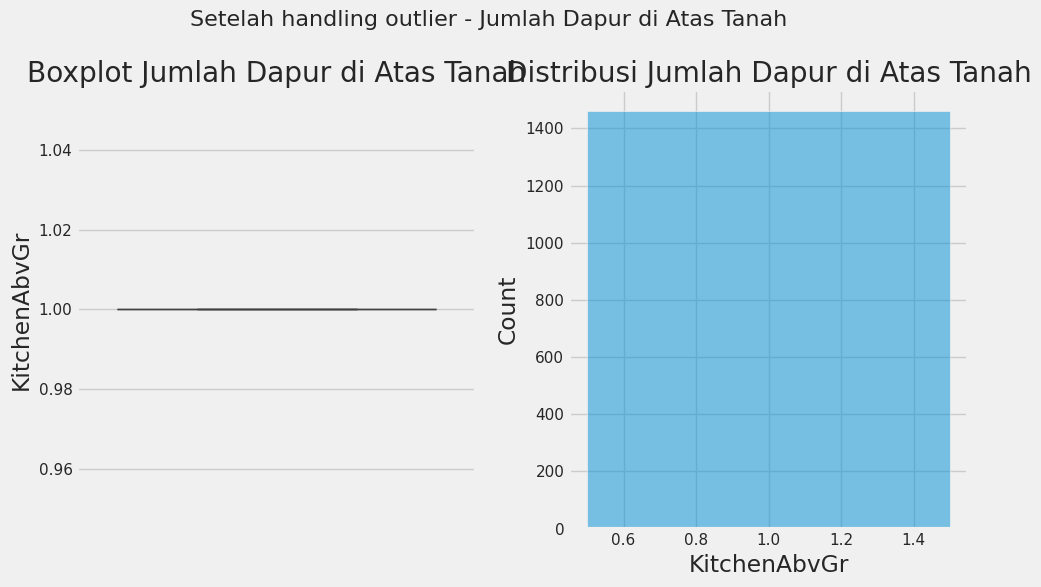

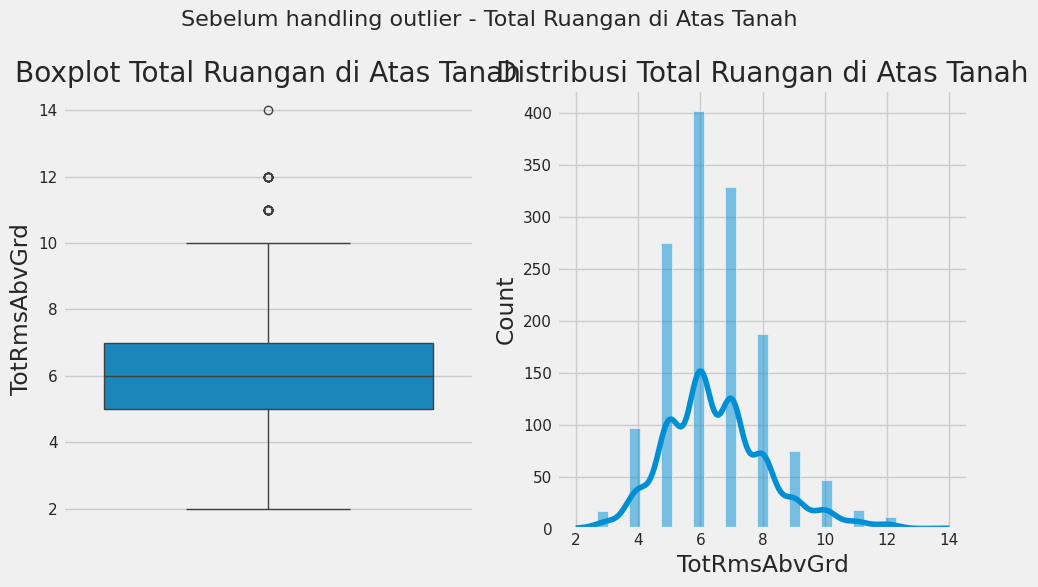

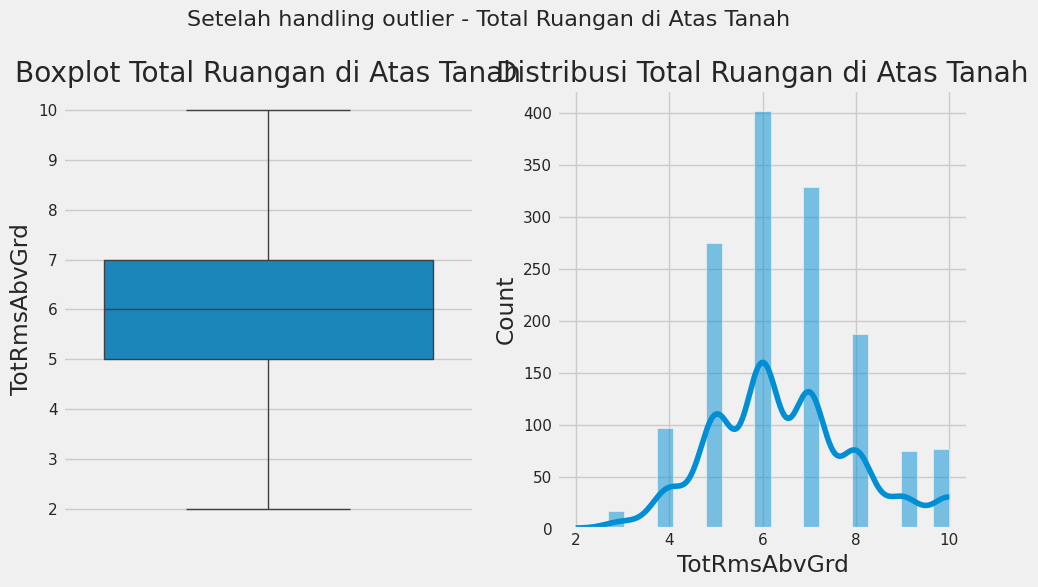

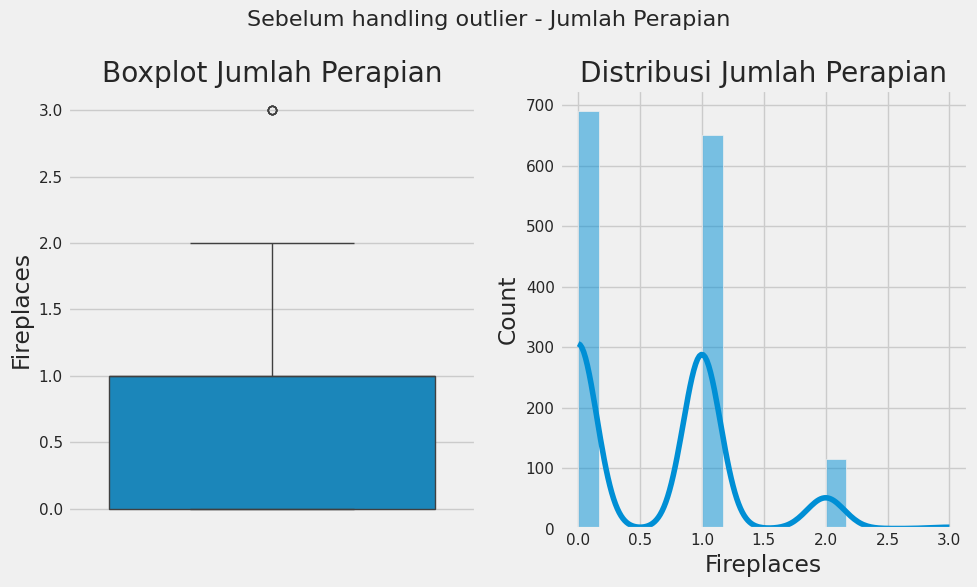

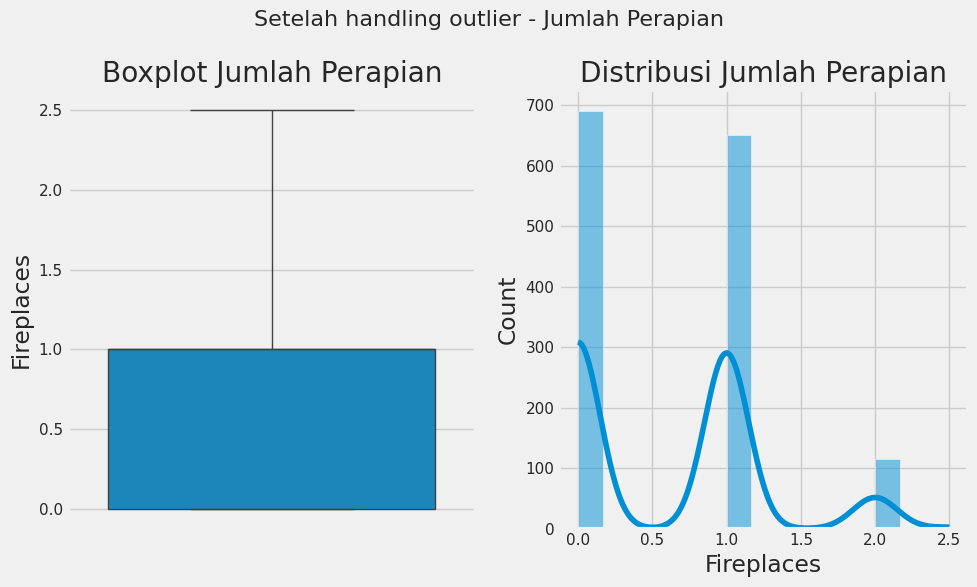

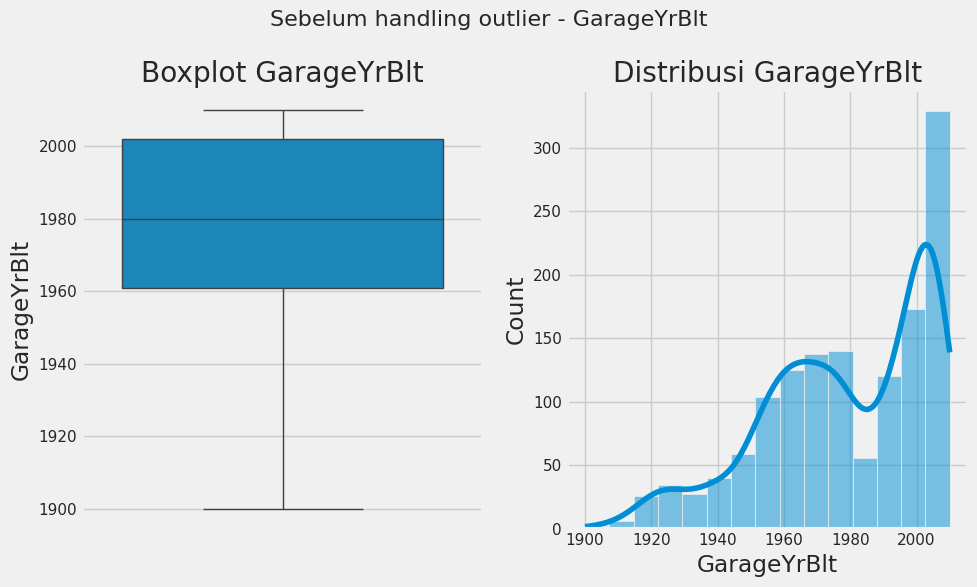

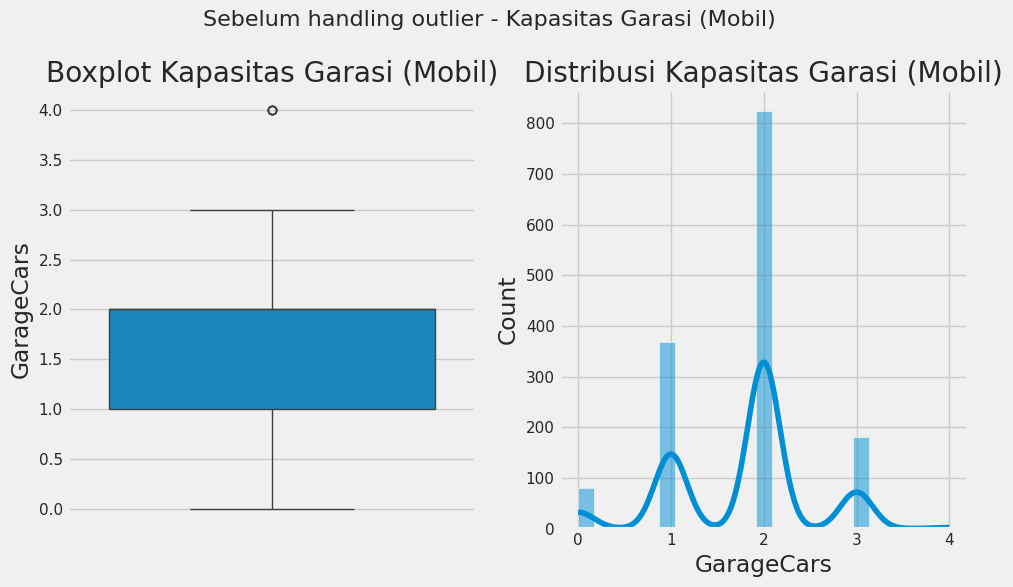

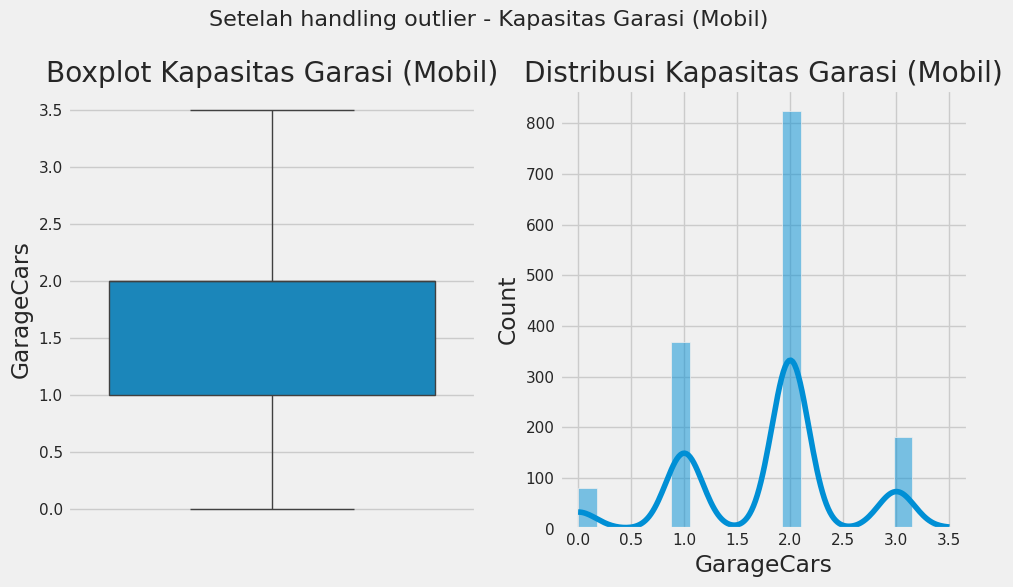

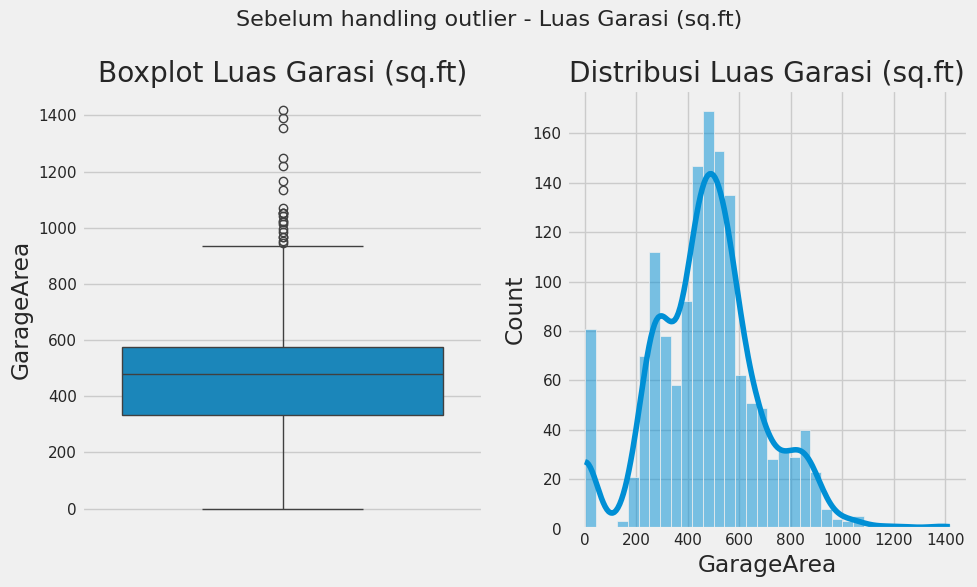

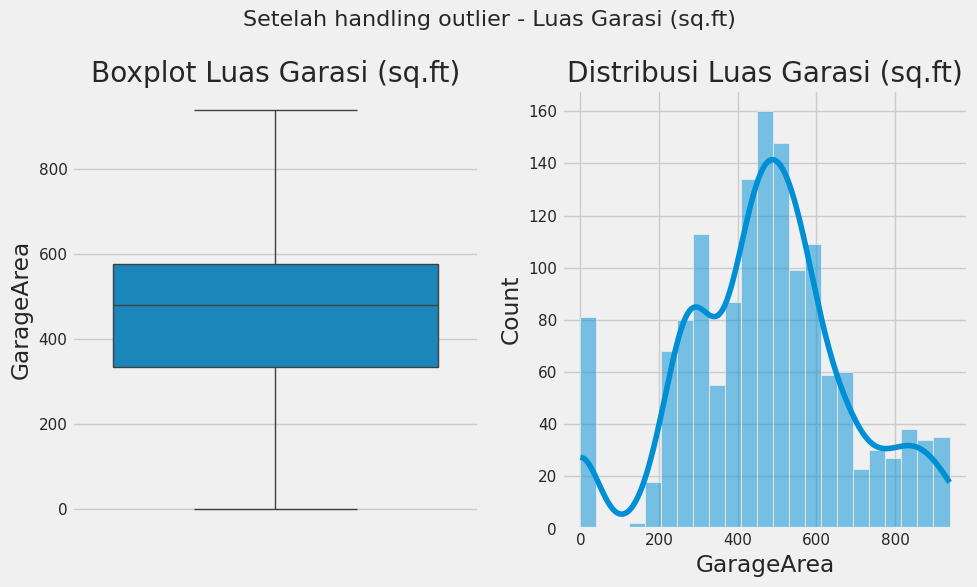

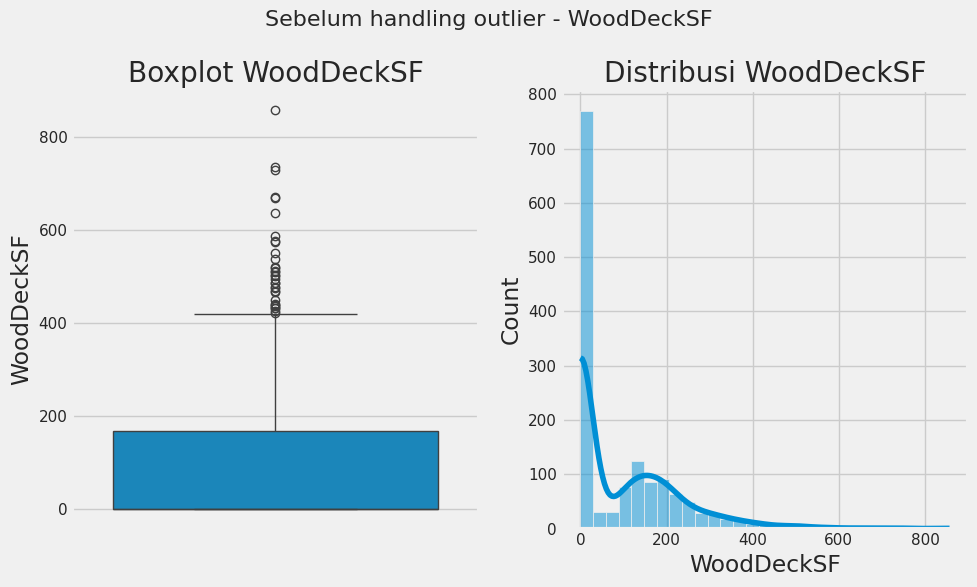

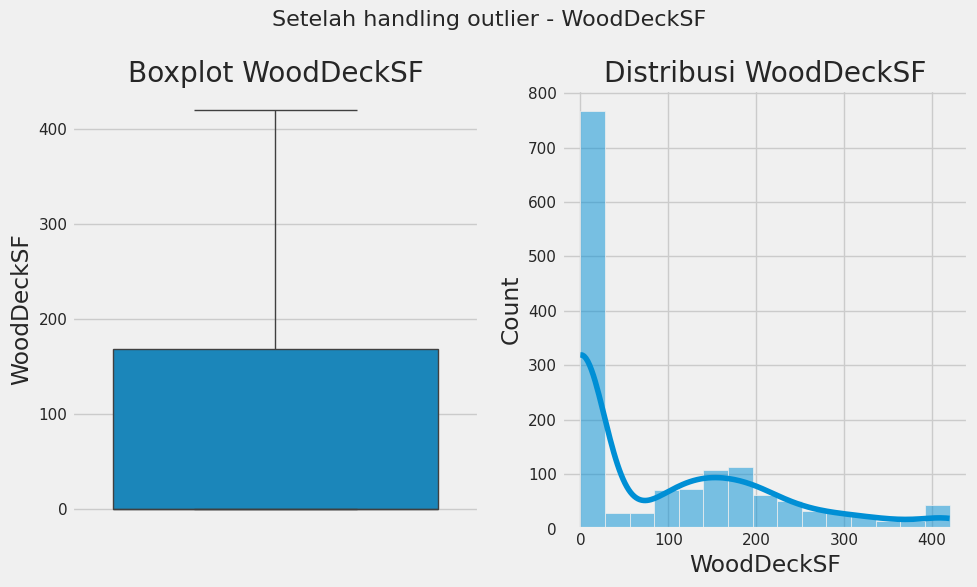

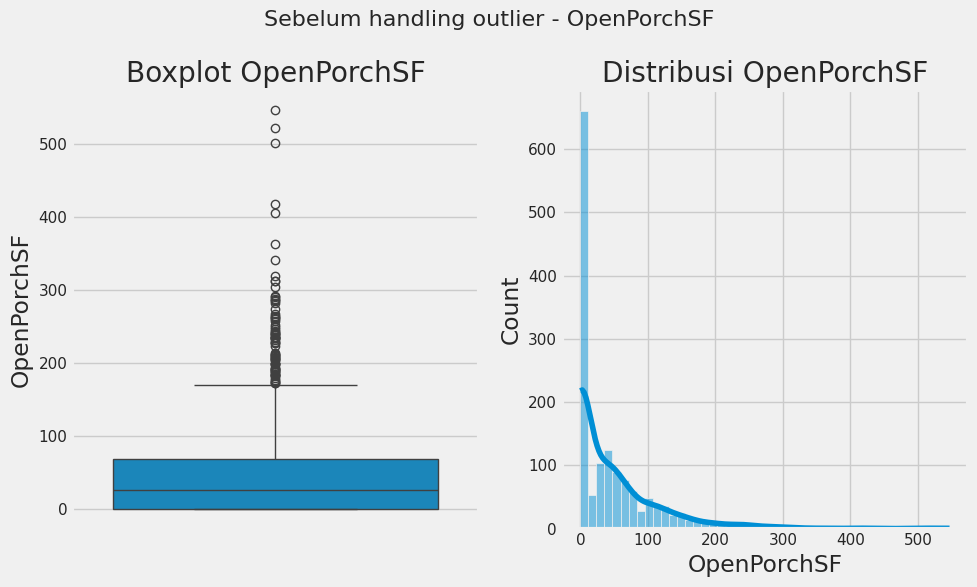

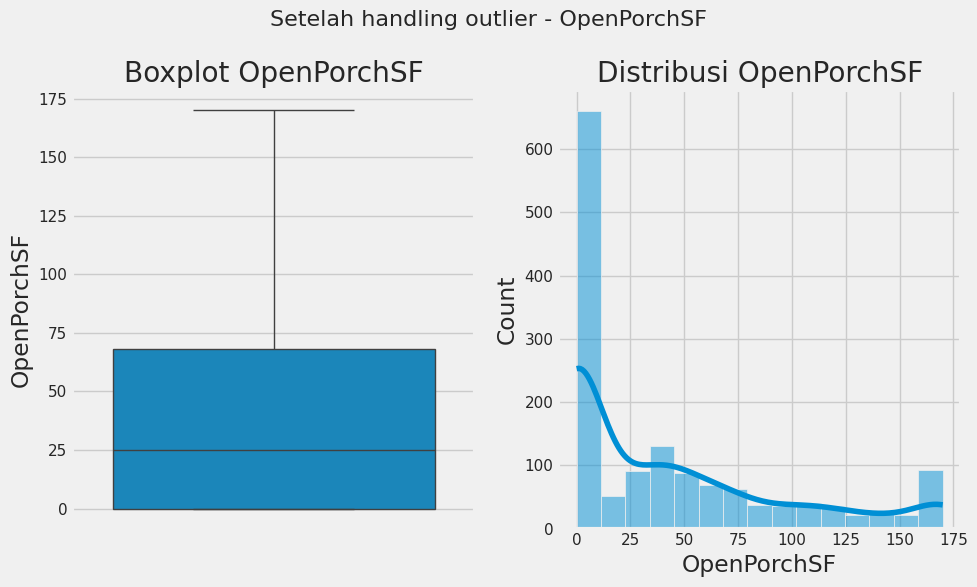

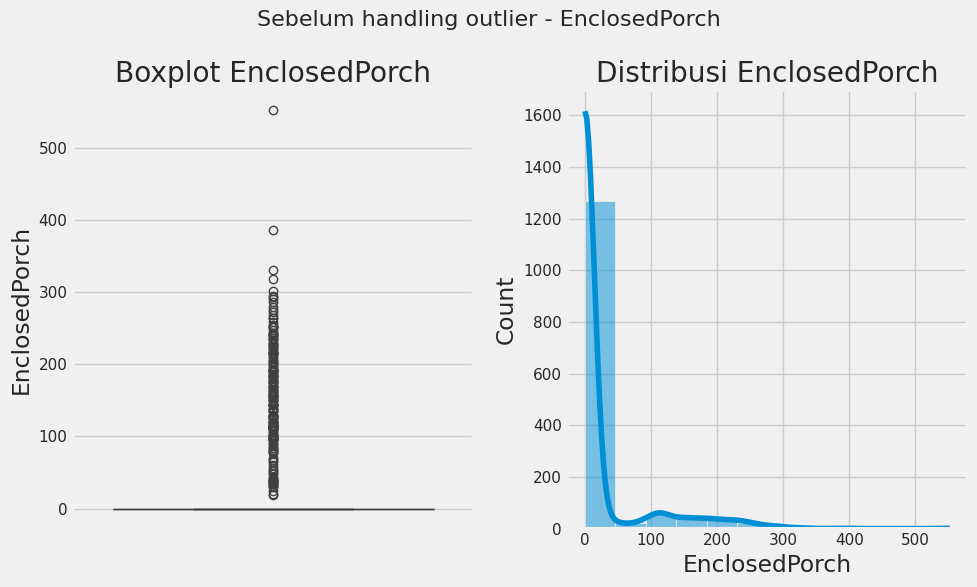

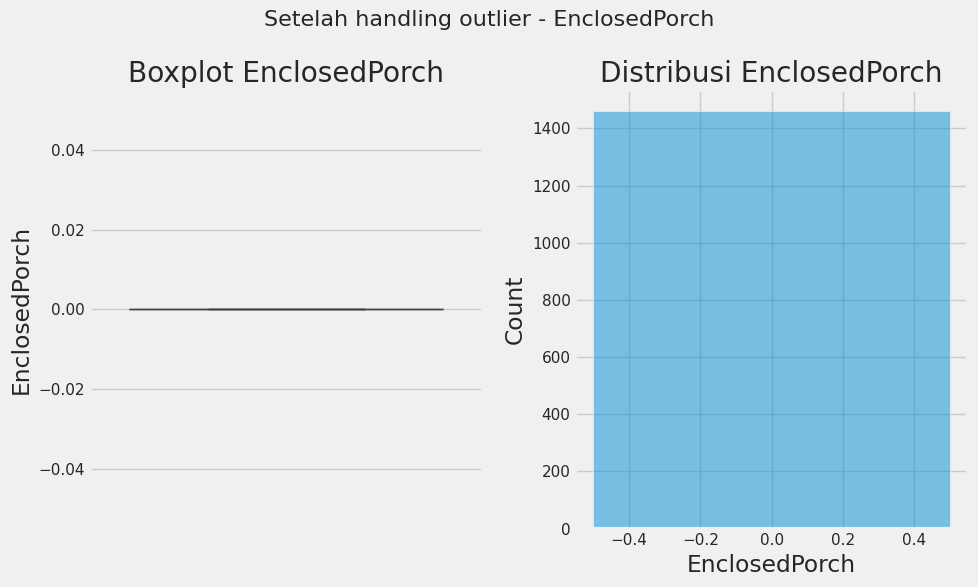

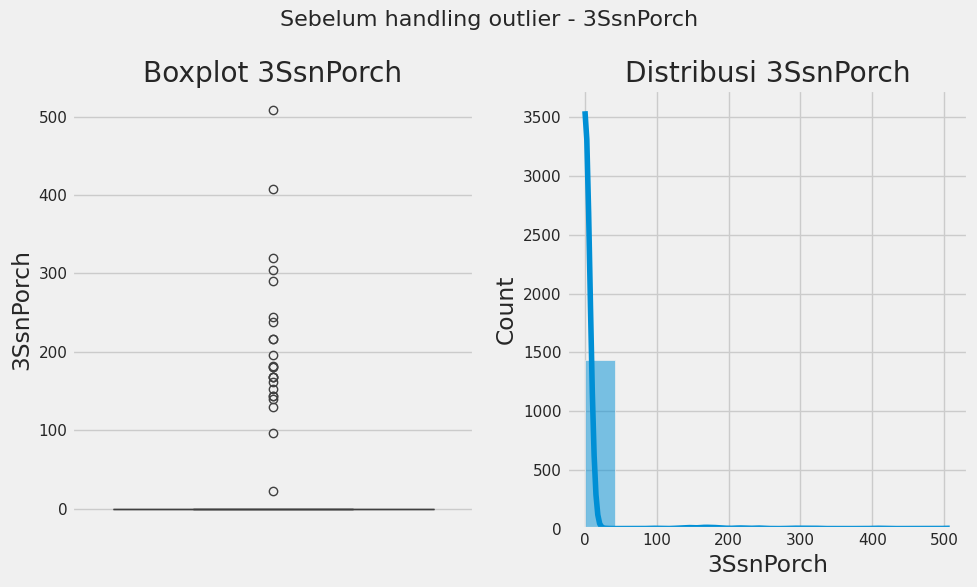

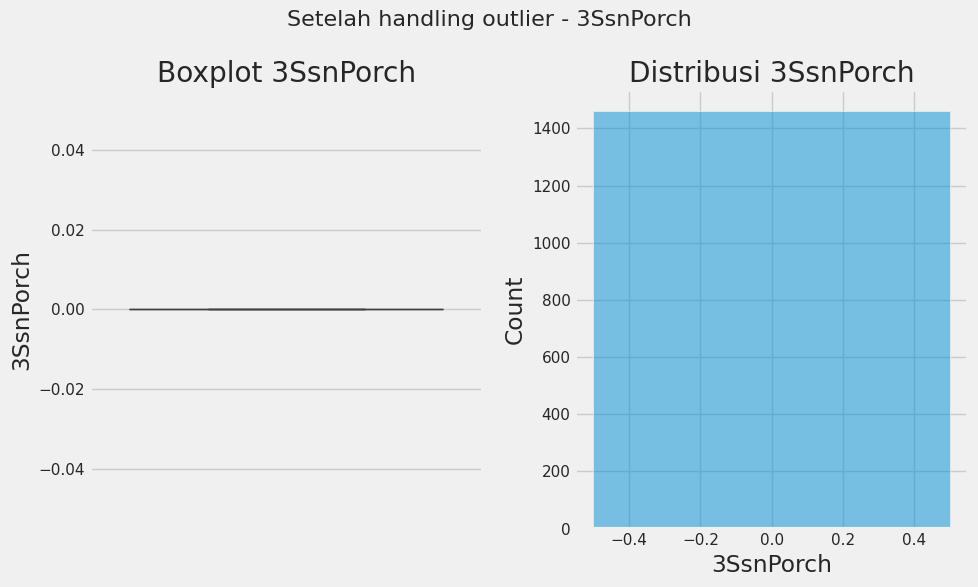

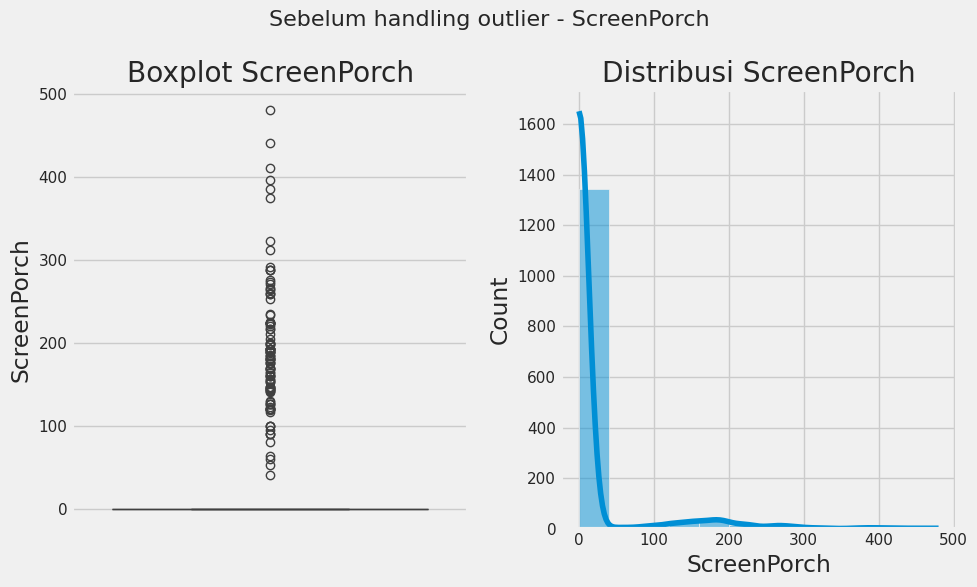

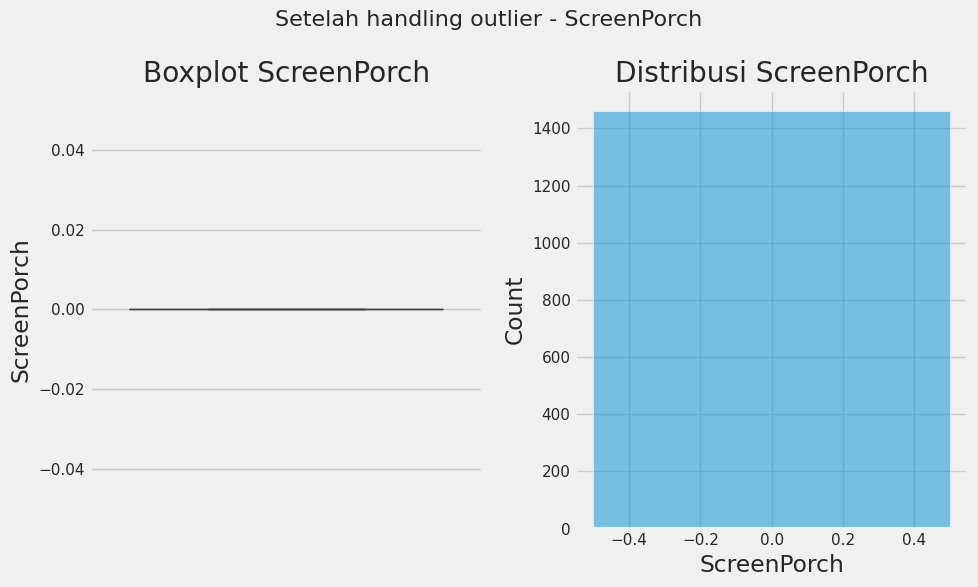

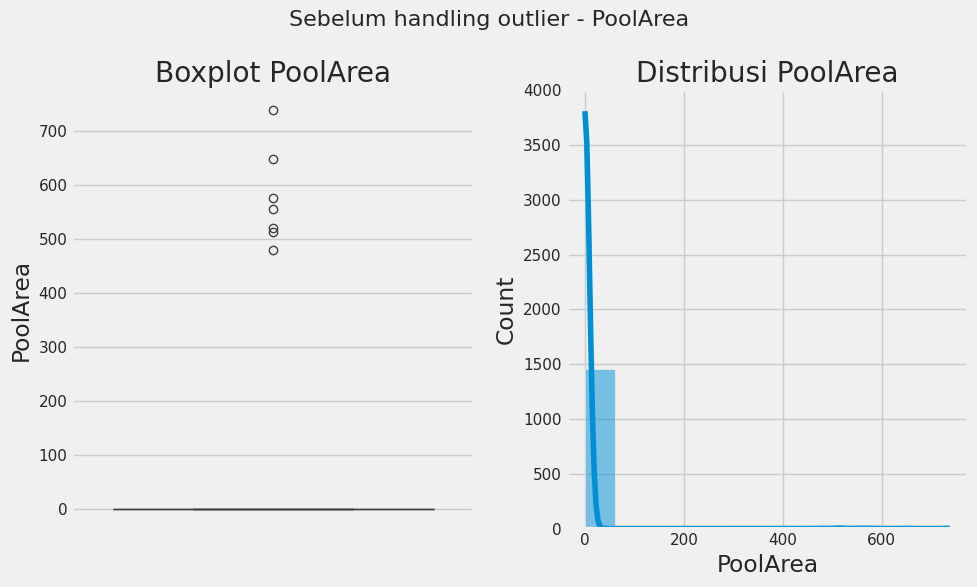

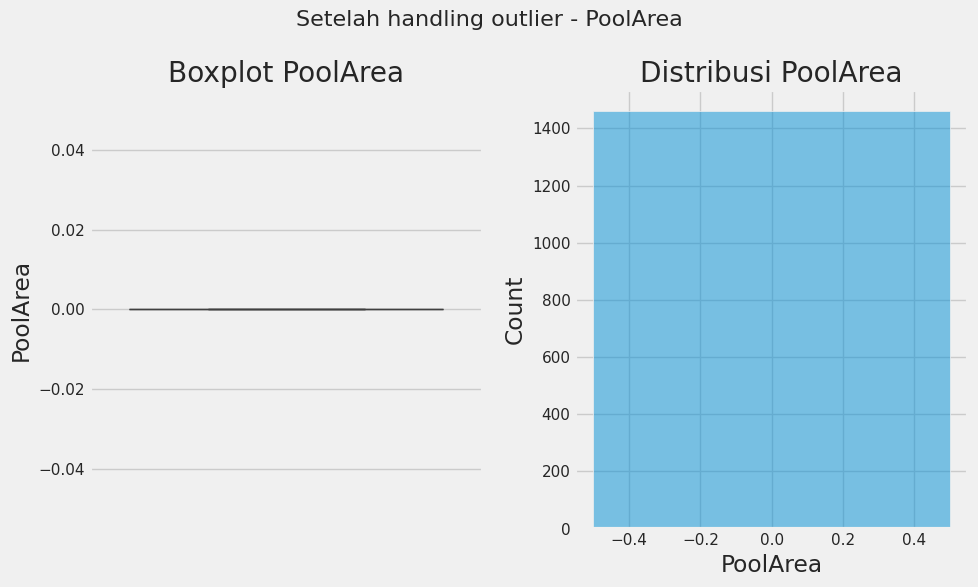

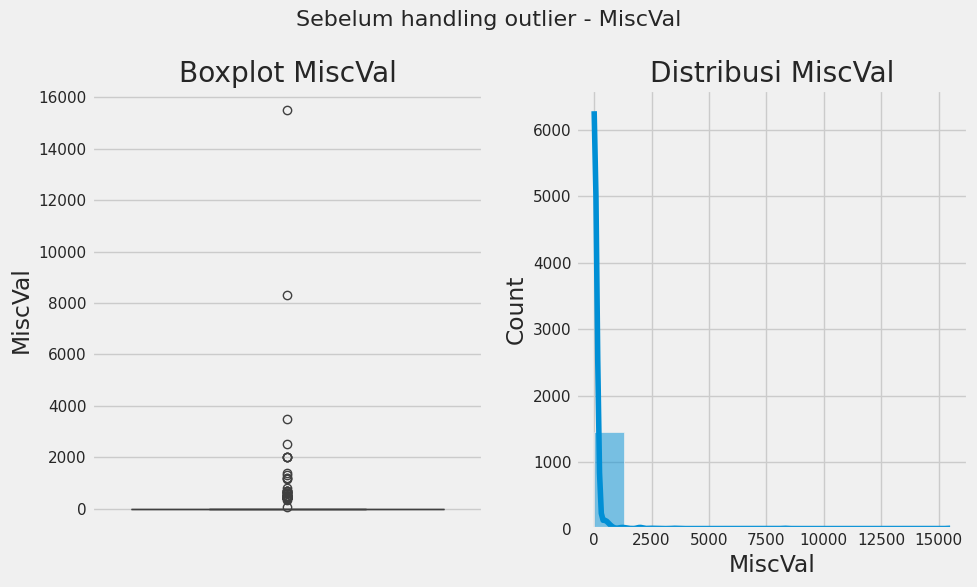

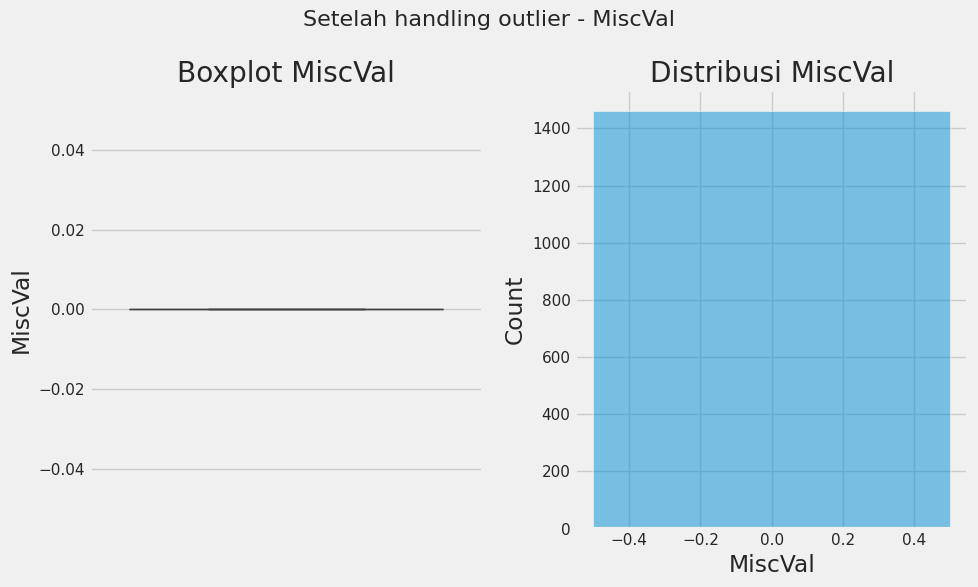

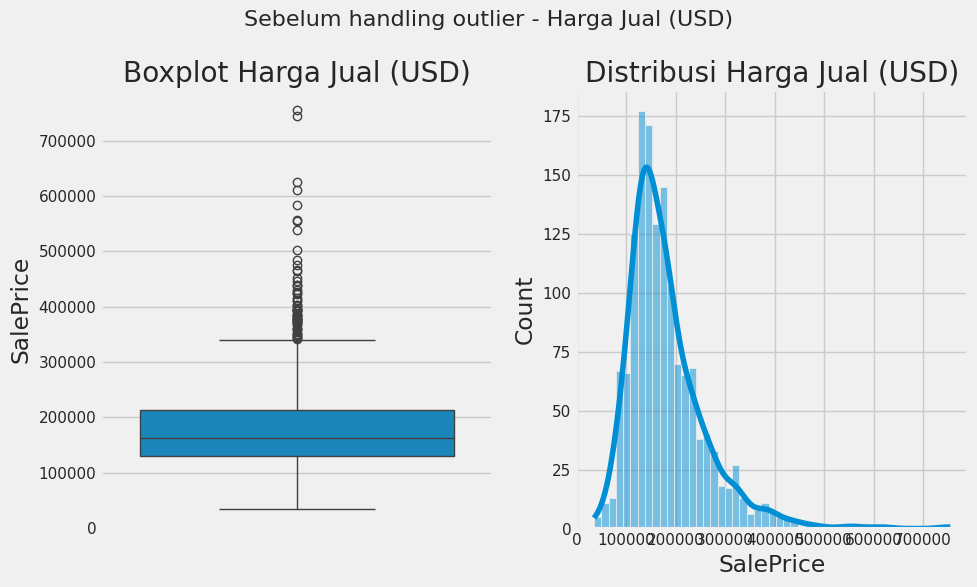

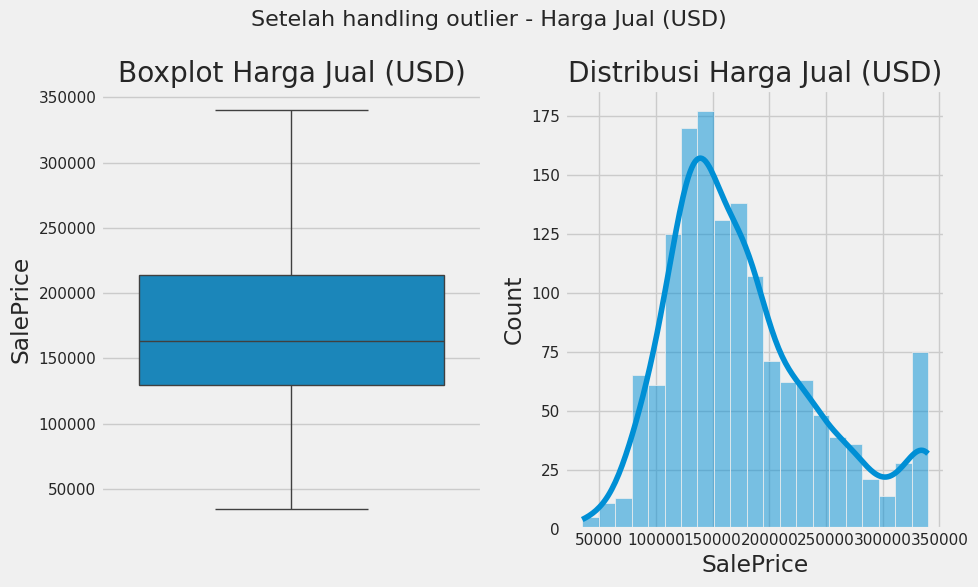

Hasil identifikasi outlier:
               jumlah_outlier  persentase_outlier
EnclosedPorch             208              14.247
BsmtFinSF2                167              11.438
OverallCond               125               8.562
ScreenPorch               116               7.945
MSSubClass                103               7.055
MasVnrArea                 96               6.575
LotFrontage                88               6.027
BsmtHalfBath               82               5.616
OpenPorchSF                77               5.274
LotArea                    69               4.726
KitchenAbvGr               68               4.658
TotalBsmtSF                61               4.178
SalePrice                  61               4.178
MiscVal                    52               3.562
BedroomAbvGr               35               2.397
WoodDeckSF                 32               2.192
GrLivArea                  31               2.123
TotRmsAbvGrd               30               2.055
BsmtUnfSF             

In [ ]:
cleaned_data, outlier_summary = handle_all_numeric_outliers(
    train_data,
    numeric_cols,
    method='cap',  # bisa diganti dengan 'remove', 'impute_mean', atau 'impute_median'
    detection_method='iqr',  # bisa diganti dengan 'zscore'
    visualize=True  # set False jika tidak ingin visualisasi
)

In [ ]:
# Bandingkan statistik sebelum dan sesudah handling outlier
print("\nStatistik sebelum handling outlier:")
(train_data[numeric_cols].describe())


Statistik sebelum handling outlier:


Id  MSSubClass  LotFrontage    LotArea  OverallQual  OverallCond  \
count 1460.000    1460.000     1201.000   1460.000     1460.000     1460.000   
mean   730.500      56.897       70.050  10516.828        6.099        5.575   
std    421.610      42.301       24.285   9981.265        1.383        1.113   
min      1.000      20.000       21.000   1300.000        1.000        1.000   
25%    365.750      20.000       59.000   7553.500        5.000        5.000   
50%    730.500      50.000       69.000   9478.500        6.000        5.000   
75%   1095.250      70.000       80.000  11601.500        7.000        6.000   
max   1460.000     190.000      313.000 215245.000       10.000        9.000   

       YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
count   1460.000      1460.000    1452.000    1460.000  ...    1460.000   
mean    1971.268      1984.866     103.685     443.640  ...      94.245   
std       30.203        20.645     181.066     456.098  ...     125.339   
min     1872.000      1950.000       0.000       0.000  ...       0.000   
25%     1954.000      1967.000       0.000       0.000  ...       0.000   
50%     1973.000      1994.000       0.000     383.500  ...       0.000   
75%     2000.000      2004.000     166.000     712.250  ...     168.000   
max     2010.000      2010.000    1600.000    5644.000  ...     857.000   

       OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal  \
count     1460.000       1460.000   1460.000     1460.000  1460.000  1460.000   
mean        46.660         21.954      3.410       15.061     2.759    43.489   
std         66.256         61.119     29.317       55.757    40.177   496.123   
min          0.000          0.000      0.000        0.000     0.000     0.000   
25%          0.000          0.000      0.000        0.000     0.000     0.000   
50%         25.000          0.000      0.000        0.000     0.000     0.000   
75%         68.000          0.000      0.000        0.000     0.000     0.000   
max        547.000        552.000    508.000      480.000   738.000 15500.000   

        MoSold   YrSold  SalePrice  
count 1460.000 1460.000   1460.000  
mean     6.322 2007.816 180921.196  
std      2.704    1.328  79442.503  
min      1.000 2006.000  34900.000  
25%      5.000 2007.000 129975.000  
50%      6.000 2008.000 163000.000  
75%      8.000 2009.000 214000.000  
max     12.000 2010.000 755000.000  

[8 rows x 38 columns]

In [ ]:
print("\nStatistik setelah handling outlier:")
(cleaned_data[numeric_cols].describe())


Statistik setelah handling outlier:


Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
count 1460.000    1460.000     1201.000  1460.000     1460.000     1460.000   
mean   730.500      55.086       69.135  9647.388        6.101        5.543   
std    421.610      37.508       19.662  3594.356        1.378        0.964   
min      1.000      20.000       27.500  1481.500        2.000        3.500   
25%    365.750      20.000       59.000  7553.500        5.000        5.000   
50%    730.500      50.000       69.000  9478.500        6.000        5.000   
75%   1095.250      70.000       80.000 11601.500        7.000        6.000   
max   1460.000     145.000      111.500 17673.500       10.000        7.500   

       YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
count   1460.000      1460.000    1452.000    1460.000  ...    1460.000   
mean    1971.268      1984.866      90.192     439.998  ...      91.807   
std       30.203        20.645     134.925     433.219  ...     116.658   
min     1872.000      1950.000       0.000       0.000  ...       0.000   
25%     1954.000      1967.000       0.000       0.000  ...       0.000   
50%     1973.000      1994.000       0.000     383.500  ...       0.000   
75%     2000.000      2004.000     166.000     712.250  ...     168.000   
max     2010.000      2010.000     415.000    1780.625  ...     420.000   

       OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
count     1460.000       1460.000   1460.000     1460.000  1460.000 1460.000   
mean        42.603          0.000      0.000        0.000     0.000    0.000   
std         52.502          0.000      0.000        0.000     0.000    0.000   
min          0.000          0.000      0.000        0.000     0.000    0.000   
25%          0.000          0.000      0.000        0.000     0.000    0.000   
50%         25.000          0.000      0.000        0.000     0.000    0.000   
75%         68.000          0.000      0.000        0.000     0.000    0.000   
max        170.000          0.000      0.000        0.000     0.000    0.000   

        MoSold   YrSold  SalePrice  
count 1460.000 1460.000   1460.000  
mean     6.322 2007.816 177331.526  
std      2.704    1.328  67205.836  
min      1.000 2006.000  34900.000  
25%      5.000 2007.000 129975.000  
50%      6.000 2008.000 163000.000  
75%      8.000 2009.000 214000.000  
max     12.000 2010.000 340037.500  

[8 rows x 38 columns]

# **Exploratory Data Analysis**

##Univariate Analysis

In [ ]:
def create_histograms_for_numeric(dataframe, numeric_cols, selected_cols=None, skip_cols=None):
    # Filter columns
    if selected_cols is not None:
        cols_to_plot = [col for col in selected_cols if col in numeric_cols]
    else:
        cols_to_plot = numeric_cols.copy()

    # Skip specified columns
    if skip_cols is not None:
        cols_to_plot = [col for col in cols_to_plot if col not in skip_cols]

    for col in cols_to_plot:
        # Skip Id column
        if col.lower() == 'id':
            continue

        # Create histogram with boxplot
        fig = px.histogram(
            dataframe,
            x=col,
            marginal='box',
            color_discrete_sequence=['#0E2954'],
            nbins=50
        )

        fig.update_traces(
            marker_line_width=1,
            marker_line_color='white'
        )

        # Create descriptive title
        if col in descriptive_names:
            col_title = descriptive_names[col]
        else:
            col_title = col.replace('_', ' ').title()

        fig.update_layout(
            plot_bgcolor='rgba(0, 0, 0, 0)',
            title=dict(
                text=f"<b>Distribusi dan Nilai Ekstrim <span style='color:#0E2954'>{col_title}</b>",
                font=dict(
                    size=28,
                    color='#757882'
                ),
                y=0.92,
                x=0.5
            ),
            yaxis=dict(
                title='Frekuensi',
                showgrid=False,
                showline=False,
                showticklabels=True,
                zeroline=False,
            ),
            xaxis=dict(
                title=col_title,
                showgrid=False,
                showline=True,
                showticklabels=True,
                zeroline=False,
            ),
            margin=dict(
                t=80,
                b=10,
                r=20
            )
        )

        fig.show()

def create_countplots_for_categorical(dataframe, cat_cols, selected_cols=None, skip_cols=None, top_n=10):
    # Filter columns
    if selected_cols is not None:
        cols_to_plot = [col for col in selected_cols if col in cat_cols]
    else:
        cols_to_plot = cat_cols.copy()

    # Skip specified columns
    if skip_cols is not None:
        cols_to_plot = [col for col in cols_to_plot if col not in skip_cols]

    for col in cols_to_plot:
        # Count values
        value_counts = dataframe[col].value_counts()

        # Limit to top N if too many categories
        if len(value_counts) > top_n:
            # Get top categories
            value_counts = value_counts.head(top_n)
            title_suffix = f" (Top {top_n})"
        else:
            title_suffix = ""

        # Create the barplot
        fig = px.bar(
            x=value_counts.values,
            y=value_counts.index,
            orientation='h',
            color_discrete_sequence=['#0E2954']
        )

        # Create descriptive title
        if col in descriptive_names:
            col_title = descriptive_names[col]
        else:
            col_title = col.replace('_', ' ').title()

        fig.update_layout(
            plot_bgcolor='rgba(0, 0, 0, 0)',
            title=dict(
                text=f"<b>Distribusi <span style='color:#0E2954'>{col_title}{title_suffix}</b>",
                font=dict(
                    size=28,
                    color='#757882'
                ),
                y=0.92,
                x=0.5
            ),
            yaxis=dict(
                title=col_title,
                showgrid=False,
                showline=False,
                showticklabels=True,
                zeroline=False,
            ),
            xaxis=dict(
                title='Jumlah',
                showgrid=False,
                showline=True,
                showticklabels=True,
                zeroline=False,
            ),
            margin=dict(
                t=80,
                b=10,
                r=20
            )
        )

        # Add values on bars
        fig.update_traces(
            texttemplate='%{x}',
            textposition='outside'
        )

        fig.show()

# 5. FUNGSI UNTUK PLOT KORELASI ANTAR FITUR NUMERIK
# Fungsi untuk visualisasi matriks korelasi dengan Plotly

def plot_correlation_matrix_plotly(df, columns=None, min_correlation=0,
                                  include_target=True, target_col='SalePrice',
                                  width=1000, height=900):
    import plotly.express as px
    import numpy as np
    import pandas as pd

    # Jika tidak ada kolom yang ditentukan, gunakan semua kolom numerik kecuali Id
    if columns is None:
        numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
        if 'Id' in numeric_cols:
            numeric_cols.remove('Id')
        columns = numeric_cols

    # Pastikan target_col ada dalam columns jika include_target=True
    if include_target and target_col not in columns and target_col in df.columns:
        columns = columns + [target_col]

    # Hitung korelasi
    correlation = df[columns].corr()

    # Filter korelasi berdasarkan nilai minimum
    if min_correlation > 0:
        # Buat mask untuk nilai korelasi yang lebih rendah dari min_correlation
        mask = np.abs(correlation) < min_correlation
        # Ganti nilai yang masuk mask dengan NaN
        correlation_filtered = correlation.copy()
        correlation_filtered = correlation_filtered.mask(mask)
        # Tetap jaga diagonal (korelasi diri sendiri = 1)
        np.fill_diagonal(correlation_filtered.values, 1)
        # Filter kolom-kolom yang memiliki minimal satu korelasi signifikan dengan kolom lain
        # Ini untuk menghindari kolom yang sepenuhnya NaN
        valid_columns = ~correlation_filtered.isna().all()
        valid_columns = valid_columns[valid_columns].index.tolist()

        # Jika include_target=True, pastikan target_col tetap ada
        if include_target and target_col not in valid_columns and target_col in df.columns:
            valid_columns = valid_columns + [target_col]

        # Filter correlation matrix
        correlation = correlation.loc[valid_columns, valid_columns]

    # Buat dictionary untuk nama deskriptif untuk setiap kolom
    descriptive_names = {
        'OverallQual': 'Kualitas Material dan Finishing Rumah',
        'OverallCond': 'Kondisi Umum Rumah',
        'GrLivArea': 'Luas Area Tinggal di Atas Tanah (sq.ft)',
        'TotalBsmtSF': 'Total Luas Basement (sq.ft)',
        'GarageArea': 'Luas Garasi (sq.ft)',
        'YearBuilt': 'Tahun Pembangunan Rumah',
        'YearRemodAdd': 'Tahun Renovasi Terakhir',
        'SalePrice': 'Harga Jual (USD)',
        '1stFlrSF': 'Luas Lantai 1 (sq.ft)',
        '2ndFlrSF': 'Luas Lantai 2 (sq.ft)',
        'LotArea': 'Luas Lahan (sq.ft)',
        'BedroomAbvGr': 'Jumlah Kamar Tidur di Atas Tanah',
        'KitchenAbvGr': 'Jumlah Dapur di Atas Tanah',
        'TotRmsAbvGrd': 'Total Ruangan di Atas Tanah',
        'Fireplaces': 'Jumlah Perapian',
        'GarageCars': 'Kapasitas Garasi (Mobil)',
        'FullBath': 'Jumlah Kamar Mandi Lengkap',
        'HalfBath': 'Jumlah Kamar Mandi Setengah',
        'MoSold': 'Bulan Terjual',
        'YrSold': 'Tahun Terjual',
        'MasVnrArea': 'Luas Veneer Batu (sq.ft)',
        'LotFrontage': 'Lebar Lahan ke Jalan (ft)',
    }

    # Buat label yang lebih deskriptif untuk axes
    labels = {col: descriptive_names.get(col, col.replace('_', ' ').title()) for col in correlation.columns}

    # Susun data untuk heatmap
    heat_data = correlation.values

    # Buat heatmap dengan Plotly
    fig = px.imshow(
        heat_data,
        x=correlation.columns,
        y=correlation.columns,
        color_continuous_scale='RdBu_r',  # Skala warna merah-biru terbalik
        zmin=-1,
        zmax=1,
        labels=dict(x="Fitur", y="Fitur", color="Korelasi"),
        width=width,
        height=height
    )

    # Tambahkan informasi korelasi pada hover
    hover_text = []
    for yi, yy in enumerate(correlation.columns):
        hover_text.append([])
        for xi, xx in enumerate(correlation.columns):
            hover_text[-1].append(f'{labels[yy]} vs {labels[xx]}<br>Korelasi: {correlation.iloc[yi, xi]:.2f}')

    fig.update(data=[{
        'hovertemplate': '%{hovertext}<extra></extra>',
        'text': hover_text,
        'hovertext': hover_text
    }])

    # Tambahkan nilai korelasi pada sel
    annotations = []
    for i, row in enumerate(correlation.columns):
        for j, col in enumerate(correlation.columns):
            if i >= j:  # Hanya tampilkan nilai di segitiga bawah dan diagonal
                annotations.append(
                    dict(
                        x=j,
                        y=i,
                        text=str(round(correlation.iloc[i, j], 2)),
                        showarrow=False,
                        font=dict(
                            color="black" if abs(correlation.iloc[i, j]) < 0.7 else "white"
                        )
                    )
                )

    fig.update_layout(
        title="Matriks Korelasi Antar Fitur",
        title_font_size=24,
        annotations=annotations,
        xaxis=dict(
            tickangle=-45,
            tickfont=dict(size=10),
            tickvals=list(range(len(correlation.columns))),
            ticktext=[labels[col] for col in correlation.columns]
        ),
        yaxis=dict(
            tickfont=dict(size=10),
            tickvals=list(range(len(correlation.columns))),
            ticktext=[labels[col] for col in correlation.columns]
        )
    )

    # Tampilkan heatmap
    return fig


# 6. FUNGSI UNTUK PLOT HUBUNGAN FITUR NUMERIK DENGAN TARGET
def plot_numeric_vs_target(df, target, features=None, n_cols=3, figsize=(20, 15)):
    # Jika tidak ada fitur yang ditentukan, gunakan semua kolom numerik kecuali Id dan target
    if features is None:
        features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
        if 'Id' in features:
            features.remove('Id')
        if target in features:
            features.remove(target)

    # Hitung jumlah baris yang diperlukan dalam grid
    n_rows = (len(features) + n_cols - 1) // n_cols

    # Buat plot grid
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)

    # Ratakan axes jika perlu
    if n_rows == 1 and n_cols == 1:
        axes = np.array([axes])
    elif n_rows == 1 or n_cols == 1:
        axes = axes.flatten()

    # Loop untuk membuat plot untuk setiap fitur
    for i, feature in enumerate(features):
        # Dapatkan indeks untuk subplot
        if n_rows == 1 and n_cols == 1:
            ax = axes[0]
        elif n_rows == 1 or n_cols == 1:
            ax = axes[i]
        else:
            row_idx = i // n_cols
            col_idx = i % n_cols
            ax = axes[row_idx, col_idx]

        # Gunakan nama deskriptif jika ada
        feature_title = descriptive_names.get(feature, feature.replace('_', ' ').title())
        target_title = descriptive_names.get(target, target.replace('_', ' ').title())

        # Buat scatter plot
        sns.scatterplot(x=feature, y=target, data=df, alpha=0.5, color='#0E2954', ax=ax)

        # Tambahkan garis regresi
        sns.regplot(x=feature, y=target, data=df, scatter=False, color='red', ax=ax)

        # Set judul dan label
        ax.set_title(f'Hubungan {feature_title} dan {target_title}', fontsize=12)
        ax.set_xlabel(feature_title, fontsize=10)
        ax.set_ylabel(target_title, fontsize=10)

    # Sembunyikan plot yang tidak digunakan
    total_subplots = n_rows * n_cols
    for i in range(len(features), total_subplots):
        if n_rows == 1 and n_cols == 1:
            # Tidak perlu menyembunyikan jika hanya 1 subplot
            pass
        elif n_rows == 1 or n_cols == 1:
            axes[i].set_visible(False)
        else:
            row_idx = i // n_cols
            col_idx = i % n_cols
            axes[row_idx, col_idx].set_visible(False)

    plt.tight_layout(h_pad=5, w_pad=3)
    plt.show()

# %%
# 7. FUNGSI UNTUK PLOT HUBUNGAN FITUR KATEGORIKAL DENGAN TARGET
def plot_categorical_vs_target(df, target, features=None, n_cols=3, figsize=(20, 15), top_n=10):
    # Jika tidak ada fitur yang ditentukan, gunakan semua kolom kategorikal
    if features is None:
        features = df.select_dtypes(include=['object']).columns.tolist()

    # Hitung jumlah baris yang diperlukan dalam grid
    n_rows = (len(features) + n_cols - 1) // n_cols

    # Buat plot grid
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)

    # Ratakan axes jika perlu
    if n_rows == 1 and n_cols == 1:
        axes = np.array([axes])
    elif n_rows == 1 or n_cols == 1:
        axes = axes.flatten()

    # Loop untuk membuat plot untuk setiap fitur
    for i, feature in enumerate(features):
        # Dapatkan indeks untuk subplot
        if n_rows == 1 and n_cols == 1:
            ax = axes[0]
        elif n_rows == 1 or n_cols == 1:
            ax = axes[i]
        else:
            row_idx = i // n_cols
            col_idx = i % n_cols
            ax = axes[row_idx, col_idx]

        # Gunakan nama deskriptif jika ada
        feature_title = descriptive_names.get(feature, feature.replace('_', ' ').title())
        target_title = descriptive_names.get(target, target.replace('_', ' ').title())

        # Hitung value counts
        value_counts = df[feature].value_counts()

        # Batasi jumlah kategori jika terlalu banyak
        if len(value_counts) > top_n:
            top_categories = value_counts.head(top_n).index
            # Buat kategori baru untuk "Lainnya"
            df_plot = df.copy()
            df_plot[feature] = df_plot[feature].apply(lambda x: x if x in top_categories else 'Lainnya')
            # Plot
            sns.boxplot(x=feature, y=target, data=df_plot, ax=ax, palette='Blues',
                       order=df_plot[feature].value_counts().index)
            ax.set_title(f'Hubungan {feature_title} dan {target_title} (Top {top_n})', fontsize=12)
        else:
            # Plot semua kategori jika jumlahnya tidak terlalu banyak
            sns.boxplot(x=feature, y=target, data=df, ax=ax, palette='Blues',
                      order=df[feature].value_counts().index)
            ax.set_title(f'Hubungan {feature_title} dan {target_title}', fontsize=12)

        # Set label
        ax.set_xlabel(feature_title, fontsize=10)
        ax.set_ylabel(target_title, fontsize=10)

        # Rotate x-axis labels if needed
        plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

    # Sembunyikan plot yang tidak digunakan
    total_subplots = n_rows * n_cols
    for i in range(len(features), total_subplots):
        if n_rows == 1 and n_cols == 1:
            # Tidak perlu menyembunyikan jika hanya 1 subplot
            pass
        elif n_rows == 1 or n_cols == 1:
            axes[i].set_visible(False)
        else:
            row_idx = i // n_cols
            col_idx = i % n_cols
            axes[row_idx, col_idx].set_visible(False)

    plt.tight_layout(h_pad=5, w_pad=3)
    plt.show()

# %%
# 8. FUNGSI UNTUK SCATTER PLOT 3D (PLOTLY)
def create_3d_scatter(dataframe, x_col, y_col, z_col, color_col=None):
    # Get descriptive titles
    x_title = descriptive_names.get(x_col, x_col.replace('_', ' ').title())
    y_title = descriptive_names.get(y_col, y_col.replace('_', ' ').title())
    z_title = descriptive_names.get(z_col, z_col.replace('_', ' ').title())

    # Create 3D scatter plot
    if color_col:
        color_title = descriptive_names.get(color_col, color_col.replace('_', ' ').title())
        fig = px.scatter_3d(
            dataframe,
            x=x_col,
            y=y_col,
            z=z_col,
            color=color_col,
            labels={
                x_col: x_title,
                y_col: y_title,
                z_col: z_title,
                color_col: color_title
            },
            title=f"Hubungan 3D antara {x_title}, {y_title}, dan {z_title}"
        )
    else:
        fig = px.scatter_3d(
            dataframe,
            x=x_col,
            y=y_col,
            z=z_col,
            labels={
                x_col: x_title,
                y_col: y_title,
                z_col: z_title
            },
            title=f"Hubungan 3D antara {x_title}, {y_title}, dan {z_title}"
        )

    fig.update_layout(
        title_font_size=20,
        scene=dict(
            xaxis_title=x_title,
            yaxis_title=y_title,
            zaxis_title=z_title
        )
    )

    fig.show()

In [ ]:
additional_numeric_features = ['SalePrice','1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr']
create_histograms_for_numeric(
    cleaned_data,
    numeric_cols,
    selected_cols=additional_numeric_features,
    skip_cols=['Id']
)

In [ ]:
# Contoh penggunaan fungsi untuk visualisasi kategorikal dengan plotly
additional_categorical_features = ['ExterQual', 'KitchenQual', 'BsmtQual', 'GarageType', 'SaleCondition']
create_countplots_for_categorical(
    cleaned_data,
    categorical_cols,
    selected_cols=additional_categorical_features,
    top_n=10
)

##Multivariate Analysis

In [ ]:
key_features = ['SalePrice', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'YearBuilt']
fig2 = plot_correlation_matrix_plotly(cleaned_data, columns=key_features, min_correlation=0)
fig2.show()

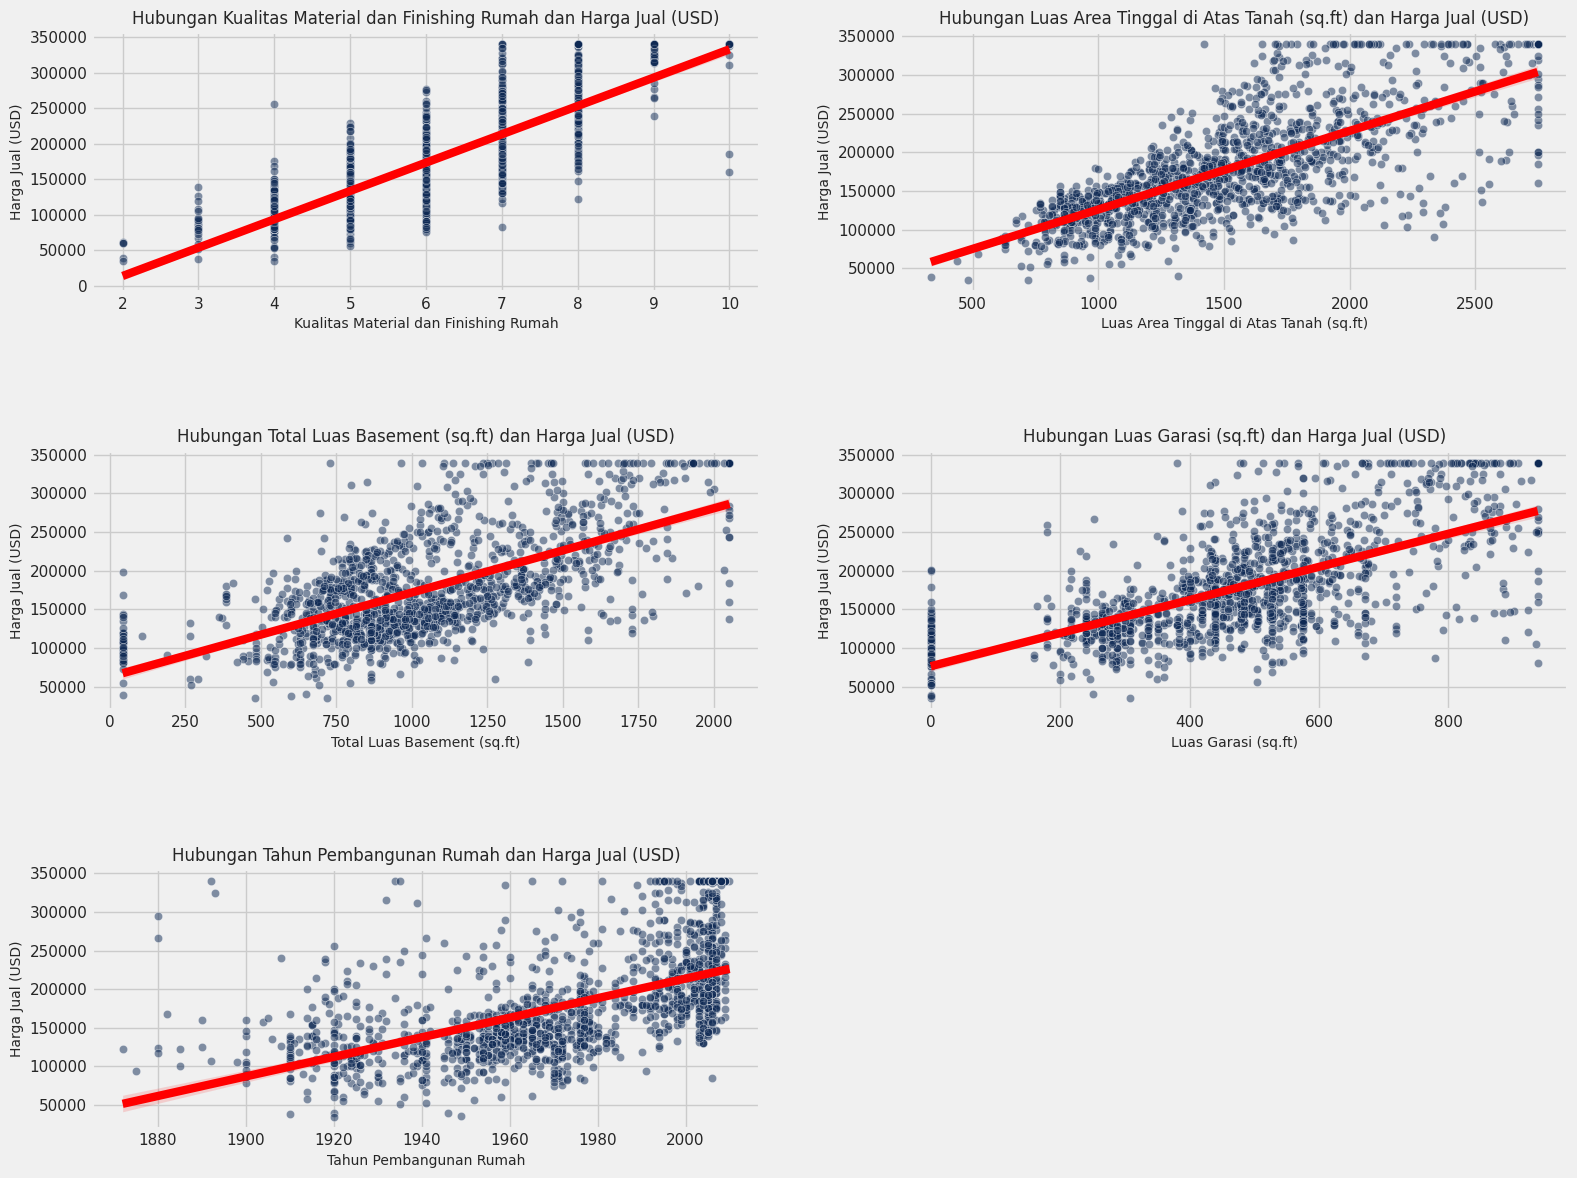

In [ ]:
# Contoh penggunaan fungsi untuk hubungan fitur numerik dengan target
key_numeric_features = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'YearBuilt']
plot_numeric_vs_target(cleaned_data, 'SalePrice', features=key_numeric_features, n_cols=2, figsize=(16, 12))


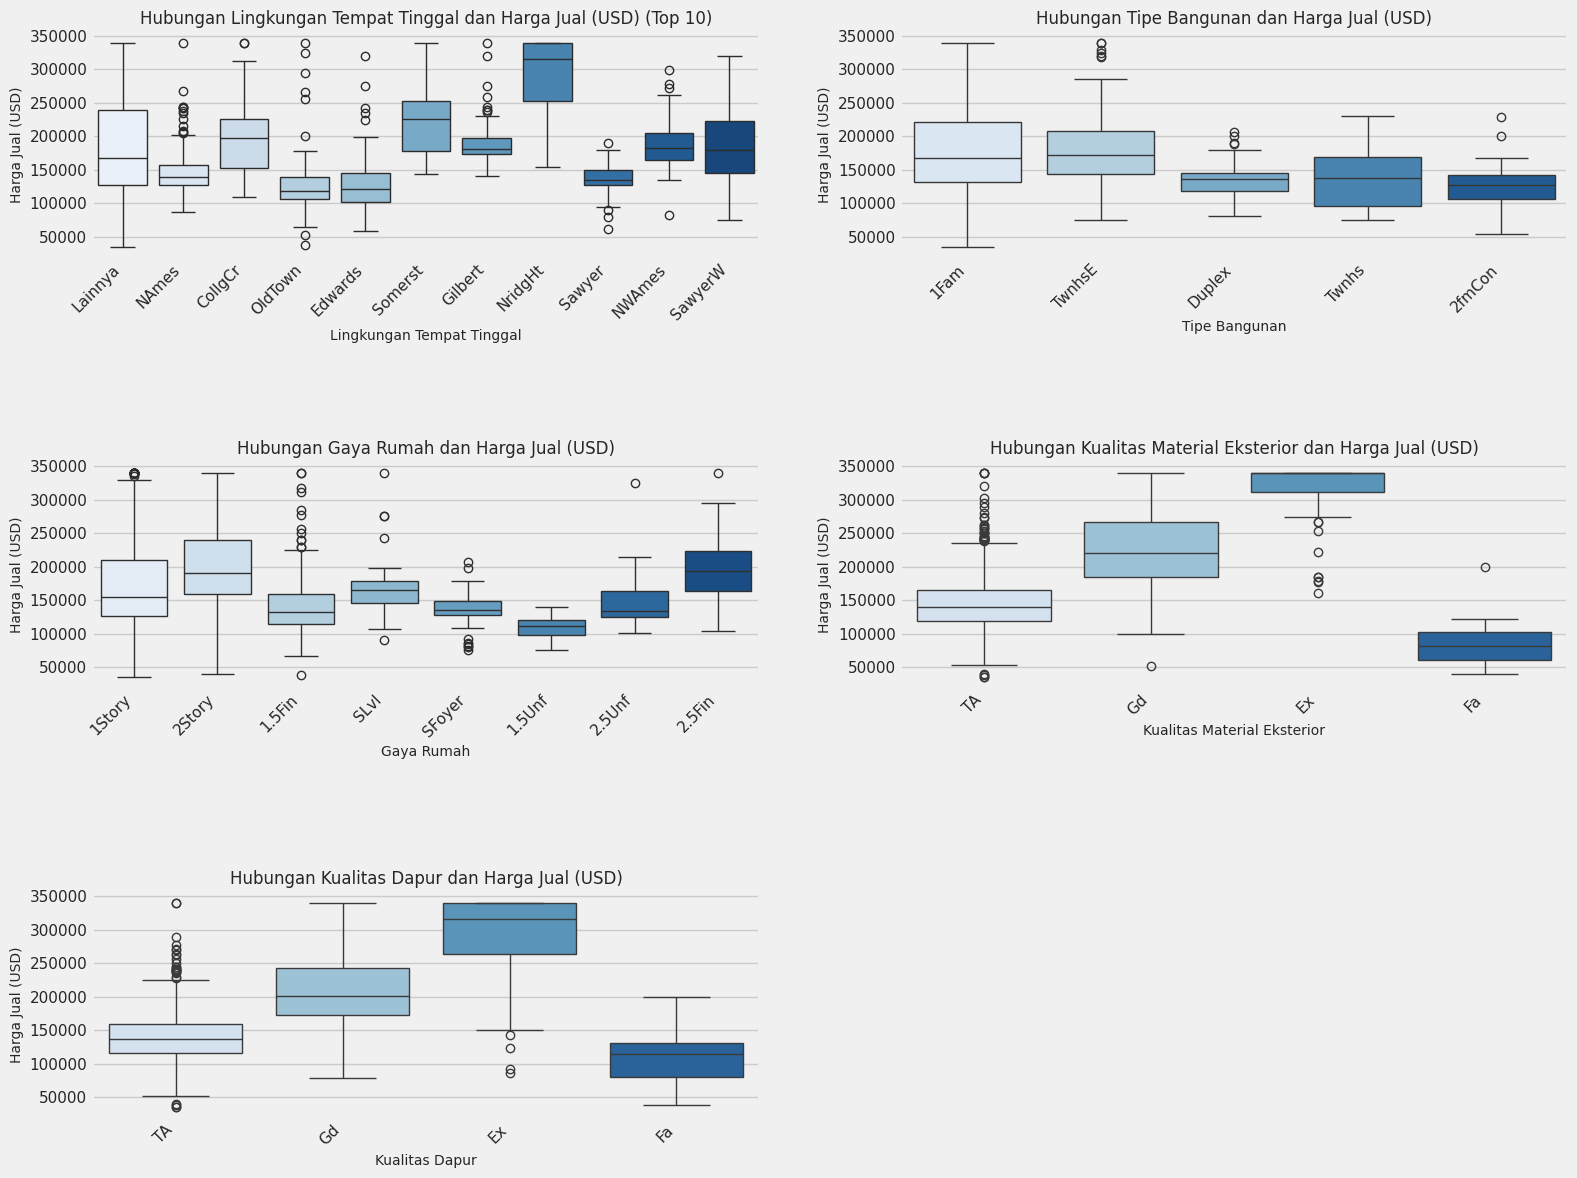

In [ ]:
# Contoh penggunaan fungsi untuk hubungan fitur kategorikal dengan target
key_categorical_features = ['Neighborhood', 'BldgType', 'HouseStyle', 'ExterQual', 'KitchenQual']
plot_categorical_vs_target(cleaned_data, 'SalePrice', features=key_categorical_features, n_cols=2, figsize=(16, 12))


# **Feature Engineering**

In [ ]:
train_ID = cleaned_data['Id']
target = cleaned_data['SalePrice']

In [ ]:
# Gunakan hanya data training untuk preprocessing
all_data = cleaned_data.drop(['Id', 'SalePrice'], axis=1).copy()

In [ ]:
print(f"Total baris dataset gabungan: {all_data.shape[0]}")
print(f"Total kolom dataset gabungan: {all_data.shape[1]}")

Total baris dataset gabungan: 1460
Total kolom dataset gabungan: 79


### **Usia** Bangunan & Renovasi

In [ ]:
# Umur bangunan saat dijual
all_data['BuildingAge'] = all_data['YrSold'] - all_data['YearBuilt']

# Umur sejak terakhir direnovasi
all_data['RemodAge'] = all_data['YrSold'] - all_data['YearRemodAdd']

# Umur garasi
all_data['GarageAge'] = all_data['YrSold'] - all_data['GarageYrBlt']

# Apakah rumah pernah direnovasi?
all_data['IsRemodeled'] = (all_data['YearBuilt'] != all_data['YearRemodAdd']).astype(int)


### Gabungan Luas dan Jumlah Kamar Mandi

In [ ]:
# Jumlah total kamar mandi (basement dan lantai atas)
all_data['TotalBathrooms'] = (
    all_data['FullBath'] +
    0.5 * all_data['HalfBath'] +
    all_data['BsmtFullBath'] +
    0.5 * all_data['BsmtHalfBath']
)

### Total Luas Bangunan

In [ ]:
# Total luas bangunan dari basement, lantai 1, dan lantai 2
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF'] + all_data['BsmtUnfSF']

### Total Luas Teras

In [ ]:
# Total luas semua jenis teras
all_data['TotalPorchSF'] = (
    all_data['OpenPorchSF'] +
    all_data['EnclosedPorch'] +
    all_data['3SsnPorch'] +
    all_data['ScreenPorch']
)

### Total Luas Per Ruangan

In [ ]:
# Rasio luas tempat tinggal terhadap jumlah ruangan
all_data['LivingAreaPerRoom'] = all_data['GrLivArea'] / all_data['TotRmsAbvGrd']

# Rasio total SF terhadap semua ruangan (tidur, dapur, atas tanah)
all_data['SFPerRoom'] = all_data['TotalSF'] / (
    all_data['BedroomAbvGr'] + all_data['KitchenAbvGr'] + all_data['TotRmsAbvGrd']
)


### Indikator Fasilitas

In [ ]:
all_data['HasGarage'] = (all_data['GarageArea'] > 0).astype(int)
all_data['HasBsmt'] = (all_data['TotalBsmtSF'] > 0).astype(int)
all_data['HasFireplace'] = (all_data['Fireplaces'] > 0).astype(int)
all_data['HasPool'] = (all_data['PoolArea'] > 0).astype(int)
all_data['HasPorch'] = (all_data['TotalPorchSF'] > 0).astype(int)


### Musim Penjualan

In [ ]:
all_data['SoldInSummer'] = all_data['MoSold'].isin([6, 7, 8]).astype(int)
all_data['SoldInWinter'] = all_data['MoSold'].isin([12, 1, 2]).astype(int)


### Gabungan Ratio dan Indeks Kualitas

In [ ]:
# Rasio jumlah mobil terhadap luas garasi
all_data['GarageCarsPerSF'] = all_data['GarageArea'] / (all_data['GarageCars'].replace(0, 1))

# Luas tinggal dikali kualitas rumah
all_data['QualSF'] = all_data['GrLivArea'] * all_data['OverallQual']

# Indeks kualitas relatif terhadap umur bangunan
all_data['AgeQualityIndex'] = all_data['OverallQual'] / (all_data['BuildingAge'].replace(0, 1))

# Usia rumah per satuan luas
all_data['HouseAgePerSF'] = all_data['BuildingAge'] / (all_data['TotalSF'].replace(0, 1))

### Unused Features Dropping

In [ ]:
# Fitur-fitur lama yang sudah dirangkum/digantikan dalam fitur baru
merged_features = [
    'YearBuilt', 'YearRemodAdd', 'GarageYrBlt',
    'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath',
    'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
    'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
    'TotRmsAbvGrd', 'BedroomAbvGr', 'KitchenAbvGr',
    'GarageArea', 'GarageCars', 'GrLivArea',
    'OverallQual', 'Fireplaces', 'PoolArea', 'MoSold'
]

# Salin data lalu drop fitur yang tidak dibutuhkan
visual_data = all_data.drop(columns=merged_features).copy()

# Tambahkan target SalePrice untuk visualisasi
visual_data['SalePrice'] = y_train

# Feature Visualisation

In [ ]:
# Gabungkan kembali target SalePrice untuk visualisasi
visual_data = all_data.copy()
visual_data['SalePrice'] = y_train


## Korelasi dengan Target (SalePrice)

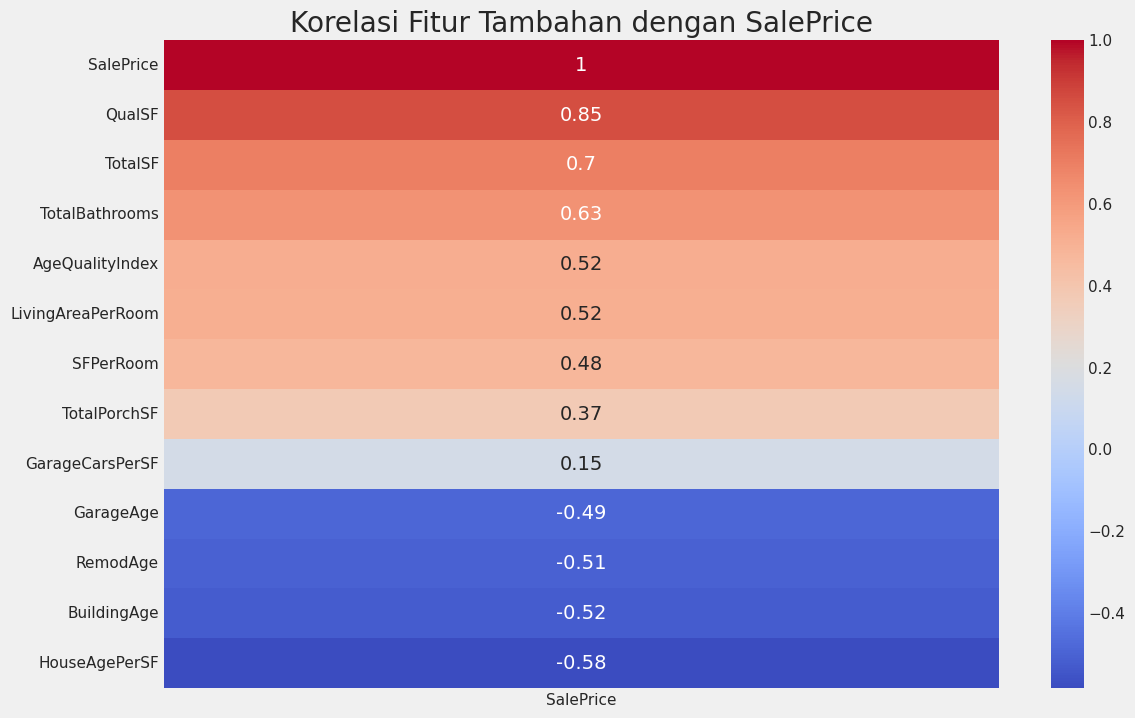

In [ ]:
# Korelasi fitur baru dengan SalePrice
plt.figure(figsize=(12, 8))
new_features = ['BuildingAge', 'RemodAge', 'GarageAge', 'TotalBathrooms', 'TotalSF', 'TotalPorchSF',
                'LivingAreaPerRoom', 'SFPerRoom', 'GarageCarsPerSF', 'QualSF',
                'AgeQualityIndex', 'HouseAgePerSF']

corr = visual_data[new_features + ['SalePrice']].corr()
sns.heatmap(corr[['SalePrice']].sort_values(by='SalePrice', ascending=False), annot=True, cmap='coolwarm')
plt.title('Korelasi Fitur Tambahan dengan SalePrice')
plt.show()


Scatter Plot Feature Numerik VS Harga

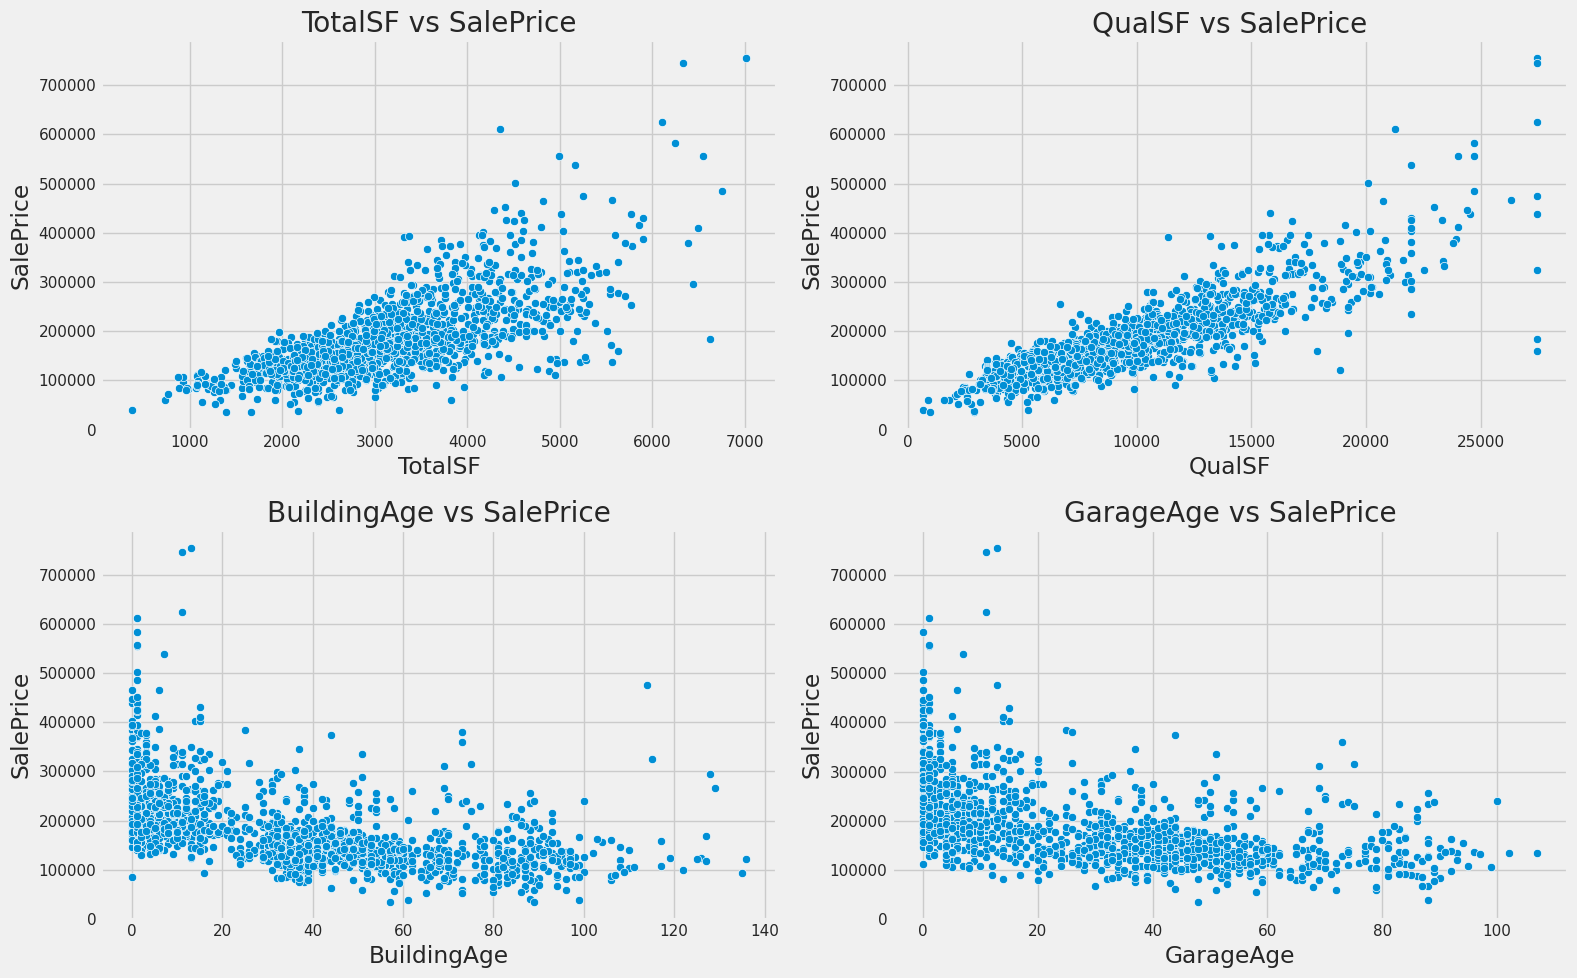

In [ ]:
# Contoh scatter plot fitur vs SalePrice
plt.figure(figsize=(16, 10))
for i, col in enumerate(['TotalSF', 'QualSF', 'BuildingAge', 'GarageAge']):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(x=visual_data[col], y=visual_data['SalePrice'])
    plt.title(f'{col} vs SalePrice')
plt.tight_layout()
plt.show()


## Boxplot Fitur Biner

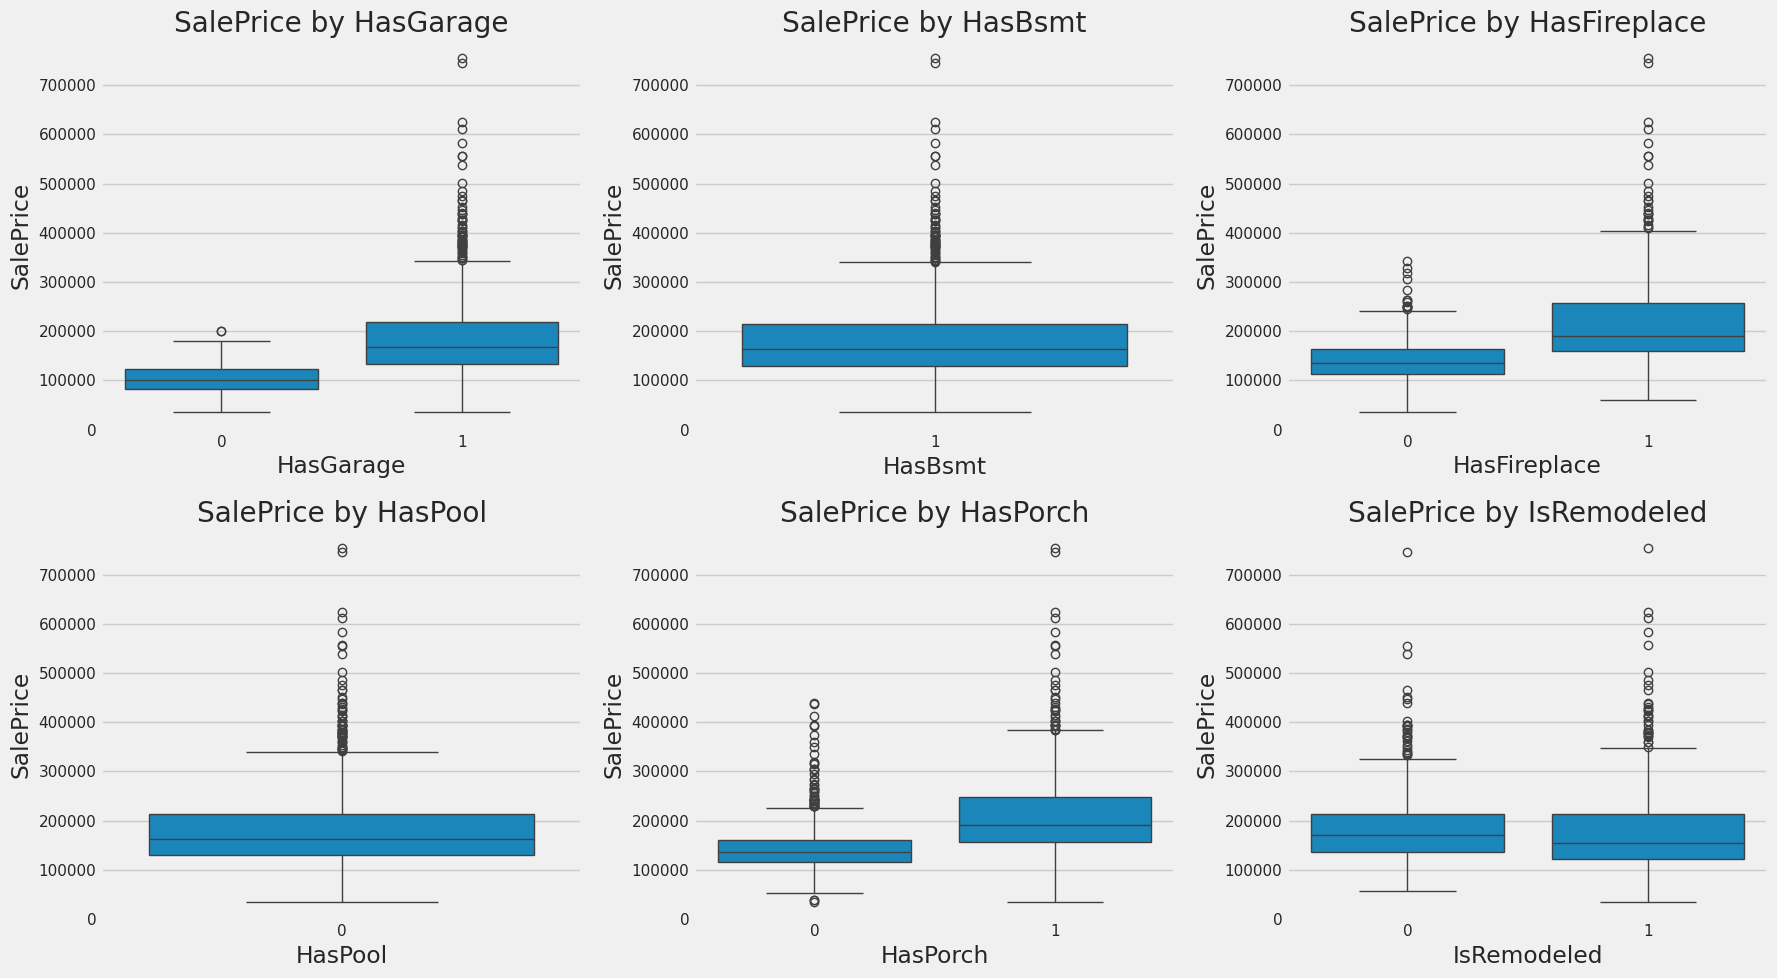

In [ ]:
# Boxplot untuk fitur biner terhadap harga rumah
binary_cols = ['HasGarage', 'HasBsmt', 'HasFireplace', 'HasPool', 'HasPorch', 'IsRemodeled']

plt.figure(figsize=(18, 10))
for i, col in enumerate(binary_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=visual_data[col], y=visual_data['SalePrice'])
    plt.title(f'SalePrice by {col}')
plt.tight_layout()
plt.show()


# **Feature Selection**

Feature Selection adalah proses memilih subset fitur yang paling relevant dengan variabel target. Ini membantu mengurangi dimensi, menghindari overfitting, dan meningkatkan interpretabilitas model.


## **One-Hot Encoding untuk Fitur Kategorikal**

Mengubah fitur kategorikal menjadi representasi biner yang dapat dipahami oleh model machine learning.


In [ ]:
# Pisahkan kembali fitur numerik dan kategorikal
categorical_cols = all_data.select_dtypes(include=['object']).columns
numerical_cols = all_data.select_dtypes(exclude=['object']).columns

# One-Hot Encoding untuk fitur kategorikal
all_data_encoded = pd.get_dummies(all_data, columns=categorical_cols, drop_first=True)

# Gabungkan kembali dengan SalePrice
all_data_encoded['SalePrice'] = y_train.values

## **Seleksi Fitur Berdasarkan Korelasi dan Pentingnya Fitur**

Korelasi terhadap SalePrice


In [ ]:
# Ambil hanya kolom numerik sebelum menghitung korelasi
numeric_data = visual_data.select_dtypes(include=['number'])

# Hitung korelasi dengan target
corr_with_target = numeric_data.corr()['SalePrice'].sort_values(ascending=False)

# Ambil fitur dengan korelasi absolut > 0.1
important_features = corr_with_target[abs(corr_with_target) > 0.1].index.tolist()
important_features.remove('SalePrice')

# Subset data yang relevan untuk Feature Selection
selected_data = numeric_data[important_features + ['SalePrice']]

## **Identifikasi dan Penanganan Multikolinearitas**

Multikolinearitas terjadi ketika fitur-fitur independen saling berkorelasi tinggi, yang dapat menyebabkan ketidakstabilan model.
VIF tinggi (umumnya >10) menandakan multikolinearitas tinggi antar fitur.


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
import pandas as pd

# Definisikan nama kolom target
target_column_name = 'SalePrice'

# Ambil hanya fitur (drop kolom target)
X_vif = selected_data.drop(columns=target_column_name)

# Pastikan tidak ada nilai NaN atau inf
X_vif_cleaned = X_vif.replace([np.inf, -np.inf], np.nan).dropna()

# Hitung VIF
vif_df = pd.DataFrame()
vif_df['feature'] = X_vif_cleaned.columns
vif_df['VIF'] = [variance_inflation_factor(X_vif_cleaned.values, i) for i in range(X_vif_cleaned.shape[1])]

# Tampilkan hasil VIF
vif_df.sort_values(by='VIF', ascending=False)

feature         VIF
3             TotalSF         inf
5         TotalBsmtSF         inf
14       YearRemodAdd         inf
11          YearBuilt         inf
9            FullBath         inf
8            1stFlrSF         inf
7      TotalBathrooms         inf
31          BsmtUnfSF         inf
37        BuildingAge         inf
36           RemodAge         inf
30       BsmtFullBath         inf
27           2ndFlrSF         inf
15        GarageYrBlt         inf
25       TotalPorchSF         inf
35          GarageAge         inf
24        OpenPorchSF         inf
28           HalfBath         inf
29          HasGarage 2420261.600
2           GrLivArea     205.973
0              QualSF      90.437
10       TotRmsAbvGrd      56.205
16          SFPerRoom      47.667
13  LivingAreaPerRoom      35.466
6          GarageArea      28.513
4          GarageCars      27.248
1         OverallQual      21.963
38      HouseAgePerSF      11.545
22         BsmtFinSF1       8.434
33    GarageCarsPerSF       7.749
18         Fireplaces       6.797
17       HasFireplace       6.562
32       BedroomAbvGr       6.429
21           HasPorch       2.600
12    AgeQualityIndex       2.434
20            LotArea       2.191
23        LotFrontage       2.078
34        OverallCond       1.714
19         MasVnrArea       1.521
26         WoodDeckSF       1.233

# **Data Splitting**

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y) from the encoded data
X = all_data_encoded.drop(columns='SalePrice')
y = all_data_encoded['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Ukuran X_train:", X_train.shape)
print("Ukuran X_test:", X_test.shape)
print("Ukuran y_train:", y_train.shape)
print("Ukuran y_test:", y_test.shape)

Ukuran X_train: (1168, 264)
Ukuran X_test: (292, 264)
Ukuran y_train: (1168,)
Ukuran y_test: (292,)


# **Scaling Data**

Scaling adalah proses mengubah skala fitur-fitur agar memiliki rentang yang seragam


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Scale the imputed data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# **Modelling**

Fungsi Evaluasi

In [ ]:
def mase(y_true, y_pred):
    naive = np.abs(np.diff(y_true)).mean()
    return np.mean(np.abs(y_true - y_pred)) / naive if naive != 0 else np.nan

def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred) * 100
    mase_val = mase(y_test.values, y_pred)
    return {'Model': name, 'R2 Score': r2, 'MAE': mae, 'MAPE (%)': mape, 'MASE': mase_val}

results = []

## Logistic Regression

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
results.append(evaluate_model('Linear Regression', lr_model, X_test_scaled, y_test))

## Random Forest

In [ ]:
param_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
}
grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_rf, scoring='r2', cv=3, n_jobs=-1)
grid_rf.fit(X_train_scaled, y_train)
best_rf = grid_rf.best_estimator_
results.append(evaluate_model('Random Forest', best_rf, X_test_scaled, y_test))

## XGBRF

In [ ]:
param_xgbrf = {
    'n_estimators': [50, 100],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.7, 0.8],
    'colsample_bynode': [0.7, 0.8]
}
grid_xgbrf = GridSearchCV(XGBRFRegressor(random_state=42), param_xgbrf, scoring='r2', cv=3, n_jobs=-1)
grid_xgbrf.fit(X_train_scaled, y_train)
best_xgbrf = grid_xgbrf.best_estimator_
results.append(evaluate_model('XGBRF', best_xgbrf, X_test_scaled, y_test))

y_pred_xgbrf = best_xgbrf.predict(X_test_scaled)

## Model Stacking

In [ ]:
stacking_model = StackingRegressor(
    estimators=[
        ('lr', LinearRegression()),
        ('rf', best_rf),
        ('xgbrf', best_xgbrf)
    ],
    final_estimator=LinearRegression(),
    cv=5
)
stacking_model.fit(X_train_scaled, y_train)
results.append(evaluate_model('Stacking Model', stacking_model, X_test_scaled, y_test))

# Visualisasi Hasil

In [ ]:
results_df = pd.DataFrame(results)
results_df.sort_values(by='R2 Score', ascending=False, inplace=True)
results_df.reset_index(drop=True, inplace=True)

# Tabel Hasil
print("Hasil Evaluasi Model:")
display(results_df.style.background_gradient(cmap="YlGnBu").format({
    'R2 Score': '{:.3f}', 'MAE': '{:,.2f}', 'MAPE (%)': '{:.2f}', 'MASE': '{:.2f}'}))

Hasil Evaluasi Model:


In [ ]:
# Random Forest with RandomizedSearchCV
param_dist_rf = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

random_search_rf = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions=param_dist_rf,
    n_iter=20,
    scoring='r2',
    cv=3,
    n_jobs=-1,
    random_state=42
)

print("Mulai RandomizedSearchCV untuk Random Forest...")
random_search_rf.fit(X_train_scaled, y_train)
best_rf = random_search_rf.best_estimator_
print("Selesai RandomizedSearchCV untuk Random Forest.")
print(f"Best parameters for Random Forest: {random_search_rf.best_params_}")
results.append(evaluate_model('Random Forest (Tuned)', best_rf, X_test_scaled, y_test))

# XGBRF with RandomizedSearchCV
param_dist_xgbrf = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 0.2),
    'subsample': uniform(0.6, 0.4),
    'colsample_bynode': uniform(0.6, 0.4)
}

random_search_xgbrf = RandomizedSearchCV(
    XGBRFRegressor(random_state=42),
    param_distributions=param_dist_xgbrf,
    n_iter=20,
    scoring='r2',
    cv=3,
    n_jobs=-1,
    random_state=42
)

print("Mulai RandomizedSearchCV untuk XGBRF...")
random_search_xgbrf.fit(X_train_scaled, y_train)
best_xgbrf = random_search_xgbrf.best_estimator_
print("Selesai RandomizedSearchCV untuk XGBRF.")
print(f"Best parameters for XGBRF: {random_search_xgbrf.best_params_}")
results.append(evaluate_model('XGBRF (Tuned)', best_xgbrf, X_test_scaled, y_test))

print("Melatih Linear Regression...")
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
results.append(evaluate_model('Linear Regression', lr_model, X_test_scaled, y_test))
print("Selesai melatih Linear Regression.")

# Model Stacking using the best estimators from RandomizedSearchCV
print("Mulai melatih Stacking Model...")
stacking_model = StackingRegressor(
    estimators=[
        ('lr', LinearRegression()),
        ('rf', best_rf),
        ('xgbrf', best_xgbrf)
    ],
    final_estimator=LinearRegression(),
    cv=3
stacking_model.fit(X_train_scaled, y_train)
print("Selesai melatih Stacking Model.")
results.append(evaluate_model('Stacking Model', stacking_model, X_test_scaled, y_test))


# Visualisasi Hasil
results_df = pd.DataFrame(results)
results_df.sort_values(by='R2 Score', ascending=False, inplace=True)
results_df.reset_index(drop=True, inplace=True)

# Tabel Hasil
print("\nHasil Evaluasi Model:")
from IPython.display import display
display(results_df.style.background_gradient(cmap="YlGnBu").format({
    'R2 Score': '{:.3f}', 'MAE': '{:,.2f}', 'MAPE (%)': '{:.2f}', 'MASE': '{:.2f}'}))


Mulai RandomizedSearchCV untuk Random Forest...
Selesai RandomizedSearchCV untuk Random Forest.
Best parameters for Random Forest: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 63}
Mulai RandomizedSearchCV untuk XGBRF...
Selesai RandomizedSearchCV untuk XGBRF.
Best parameters for XGBRF: {'colsample_bynode': np.float64(0.6186662652854461), 'learning_rate': np.float64(0.20475110376829186), 'n_estimators': 64, 'subsample': np.float64(0.7824279936868144)}
Melatih Linear Regression...
Selesai melatih Linear Regression.
Mulai melatih Stacking Model...
Selesai melatih Stacking Model.

Hasil Evaluasi Model:
